# NUMERIC (FOREX) DATA INCELEME

In [25]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
import scipy.stats as stats 
import statsmodels.stats.api as sms
import numpy as np 
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
class Info(): 
    def __init__(self,data):
        df= pd.read_excel("data.xlsx")
        print(data.head())
        print(data.info())
        print(data.describe().T)
        print(data.shape)
        print(data.columns)
    def Num_data(self):
        print(self.data.select_dtypes(include=['float64','int64']))
    def Cat_data(self):
        print(self.data.select_dtypes(include=["object"]))
        

In [27]:
df= pd.read_excel("data.xlsx")

In [4]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [6]:
Info(df)  #veri hakkında genel bilgilerin verildiği bölüm

   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_target  90_target

In [7]:
df.shape  # data 6167 gözlem ,136 değişken içermektedir.

(6167, 136)

In [9]:
df.describe().T  #Verinin istatiksel değerlerine bakıyoruz.

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


# Visualization

In [10]:
class Visualization():
    def __init__(self,data):
        self.data = data     
    def barplot(self,x,y,z = None):
        bar = sns.barplot(x = x, y = y, hue = z, data = self.data);
        return bar   
    def catplot(self, x, y, z = None):
        cat = sns.catplot(x = x, y = y, hue = z, data = self.data);
        return cat    
    def histogram(self,x, y = None):
        hist = sns.FacetGrid(self.data, hue = y, height = 5, xlim = (0, 10000)).map(sns.kdeplot, x, shade= True).add_legend();
        return hist    
    def boxplot(self,x, y = None, z = None):
        box = sns.boxplot(x = x, y = y, hue = z, data=self.data);
        return box    
    def jointplot(self,x,y):
        joint = sns.jointplot(x = x, y = y ,data = self.data, kind = "reg");
        return joint    
    def scatter(self, x, y, z = None, s = None):
        sca = sns.scatterplot(x = x, y = y, hue=z, size = s, data = self.data);
        return sca    
    def lmplot(self, x, y, z = None, c = None, r = None):
        lm = sns.lmplot(x = x, y = y, hue = z, col = c, row = r, data = self.data);
        return lm    
    def pairplot(self, x = None):
        pair = sns.pairplot(self.data, kind = "reg", hue = x);
        return pair    
    def heatmap(self):
        heat = sns.heatmap(self.data, annot = True, fmt = "d");
        return heat     
    def lineplot(self, x, y, z = None, s = None):
        lin = sns.lineplot(x = x, y = y, hue = z, style = s, markers = True,  dashes = False, data = self.data);
        return lin    
    def countplot(self, column):
        count = sns.countplot(self.data.iloc[:,column], data = self.data, palette = "Set3");
        return count    
    def cross_tab(self,x,y):
        cross = pd.crosstab(x, y)
        return cross    

In [11]:
df.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,-0.011307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.626439,0.567359,0.593799,-0.631961,0.739227,0.776076,0.700736,-0.066201,-0.066437,-0.051049,...,0.293592,-0.571432,-0.356302,-0.594243,0.341017,1.000000,0.584754,0.019599,0.009063,-0.002519
ind_428,0.817302,0.810371,0.445427,-0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.574646,-0.499656,-0.260048,-0.487564,0.188853,0.584754,1.000000,0.047041,0.052418,0.043563
20_target,0.060969,0.062101,-0.004126,-0.031316,0.016423,0.042550,0.041289,0.015320,0.012012,0.026881,...,0.066637,-0.029005,-0.009829,-0.045656,-0.008799,0.019599,0.047041,1.000000,0.384076,0.355950
50_target,0.068989,0.069652,0.006984,-0.004053,0.006654,0.055045,0.048302,0.072728,0.084561,0.101774,...,0.127234,0.008239,0.047728,-0.101488,-0.003372,0.009063,0.052418,0.384076,1.000000,0.940916


In [12]:
df[['20_target','50_target','90_target']].describe().T

,count,mean,std,min,25%,50%,75%,max
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694
90_target,6167.0,-3.315072,36.841541,-38.573858,-37.695273,-35.788391,37.521892,38.465649


In [13]:
cor = df.corr()["50_target"].abs()
cor

ind_5        0.068989
ind_6        0.069652
ind_8        0.006984
ind_9        0.004053
ind_10       0.006654
               ...   
ind_426      0.009063
ind_428      0.052418
20_target    0.384076
50_target    1.000000
90_target    0.940916
Name: 50_target, Length: 133, dtype: float64

In [14]:
corr = cor.nlargest(10).index
corr

Index(['50_target', '90_target', '20_target', 'ind_412', 'ind_18', 'ind_17',
       'ind_324', 'ind_332', 'ind_16', 'ind_418'],
      dtype='object')

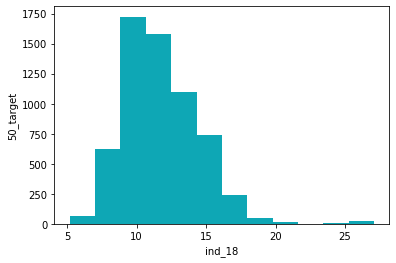

In [15]:
plt.hist(df.ind_18,bins=12,color='#0ea7b5',
         histtype="bar")

plt.xlabel("ind_18")
plt.ylabel("50_target")

plt.show()

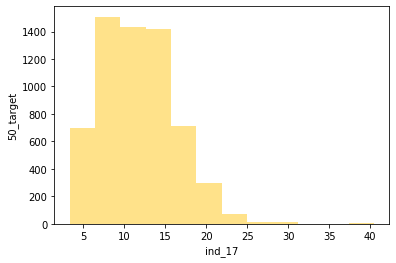

In [16]:
plt.hist(df.ind_17,bins=12,color='#ffe28a',
         histtype="bar")

plt.xlabel("ind_17")
plt.ylabel("50_target")

plt.show()

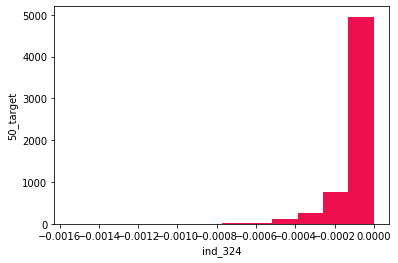

In [17]:
plt.hist(df.ind_324,bins=12,color='#ee104e',
         histtype="bar")

plt.xlabel("ind_324")
plt.ylabel("50_target")

plt.show()

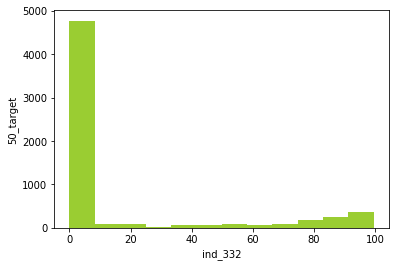

In [18]:
plt.hist(df.ind_332,bins=12,color='#9acd32',
         histtype="bar")

plt.xlabel("ind_332")
plt.ylabel("50_target")

plt.show()

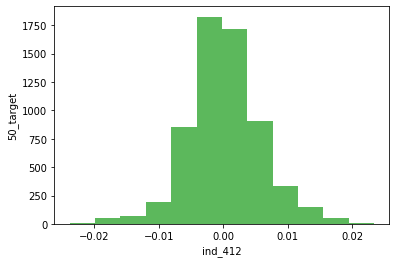

In [19]:
plt.hist(df.ind_412,bins=12,color='#5cb85c',
         histtype="bar")

plt.xlabel("ind_412")
plt.ylabel("50_target")

plt.show()

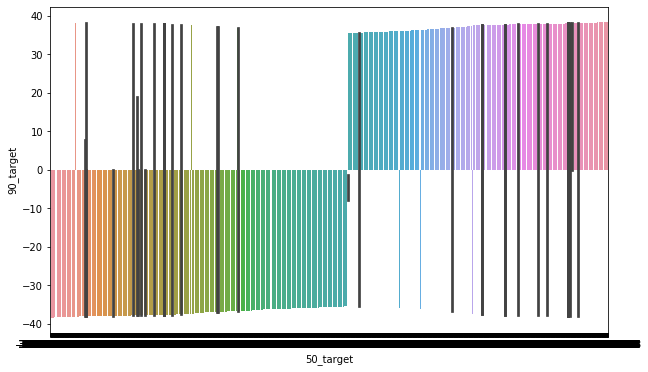

In [132]:
fig, ax = plt.subplots(figsize=(10,6))        
sns.barplot(x="50_target", y="90_target", data=data, ax=ax)

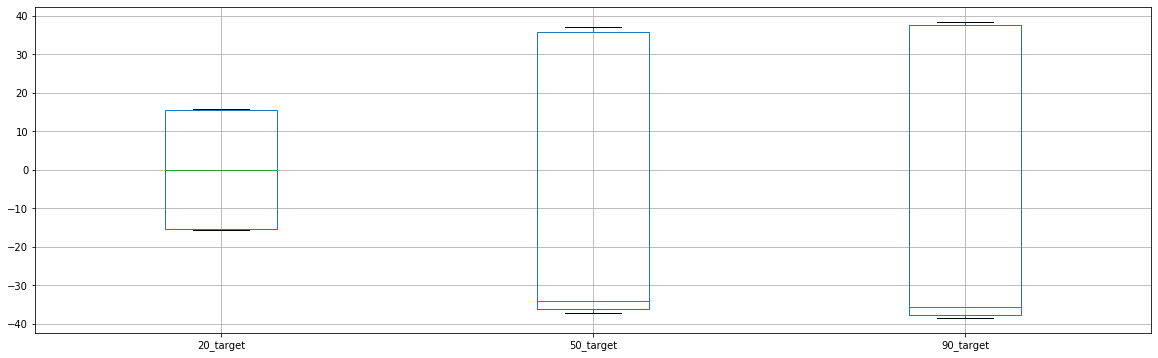

In [20]:
plt.figure(figsize=(20,6))
df.boxplot()
plt.show()

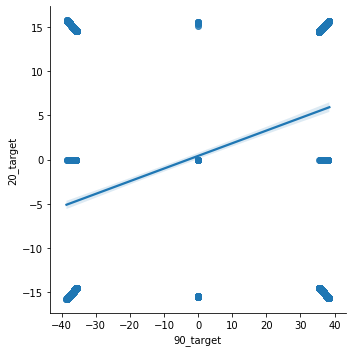

In [22]:
g = sns.lmplot(x="90_target", y="20_target", data=df)

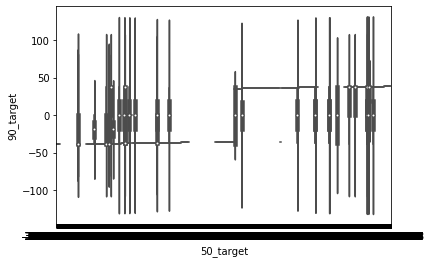

In [24]:
sns.violinplot(x ='50_target', y ='90_target', data = df,color='yellow')

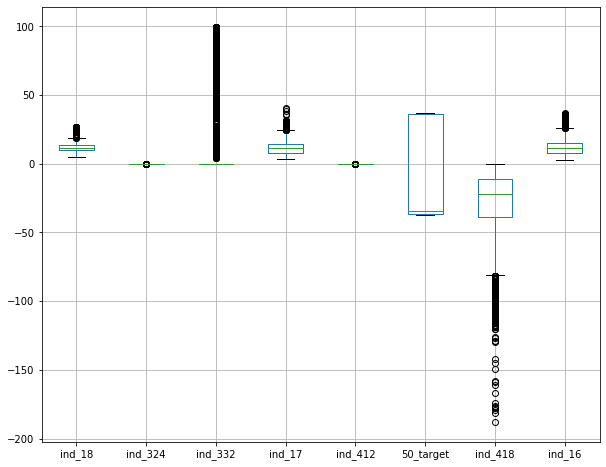

In [20]:
plt.figure(figsize=(10,8))
boxplot_df = df[["ind_18", "ind_324" , "ind_332","ind_17" , "ind_412" ,"50_target","ind_418","ind_16"]]
boxplot_df.boxplot()
plt.show()

In [21]:
new_data = df[['50_target', 'ind_412', 'ind_18', 'ind_17', 'ind_324', 'ind_332','ind_418','ind_16']]
new_data.corr()

,50_target,ind_412,ind_18,ind_17,ind_324,ind_332,ind_418,ind_16
50_target,1.000000,0.127234,0.127057,0.121097,-0.110802,0.104057,-0.101488,0.101774
ind_412,0.127234,1.000000,-0.018460,-0.036754,-0.263317,0.077782,-0.337149,-0.025170
ind_18,0.127057,-0.018460,1.000000,0.545873,-0.257567,0.160939,-0.359179,0.429029
ind_17,0.121097,-0.036754,0.545873,1.000000,-0.158633,0.064045,-0.416837,0.921295
ind_324,-0.110802,-0.263317,-0.257567,-0.158633,1.000000,-0.137205,0.400903,-0.093773
ind_332,0.104057,0.077782,0.160939,0.064045,-0.137205,1.000000,-0.152129,0.039247
ind_418,-0.101488,-0.337149,-0.359179,-0.416837,0.400903,-0.152129,1.000000,-0.362005
ind_16,0.101774,-0.025170,0.429029,0.921295,-0.093773,0.039247,-0.362005,1.000000


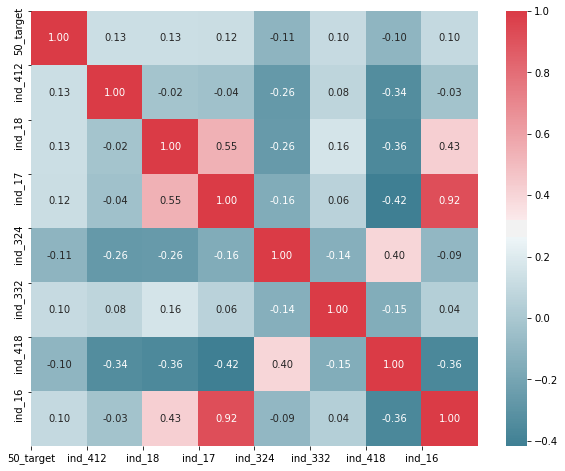

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = new_data.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

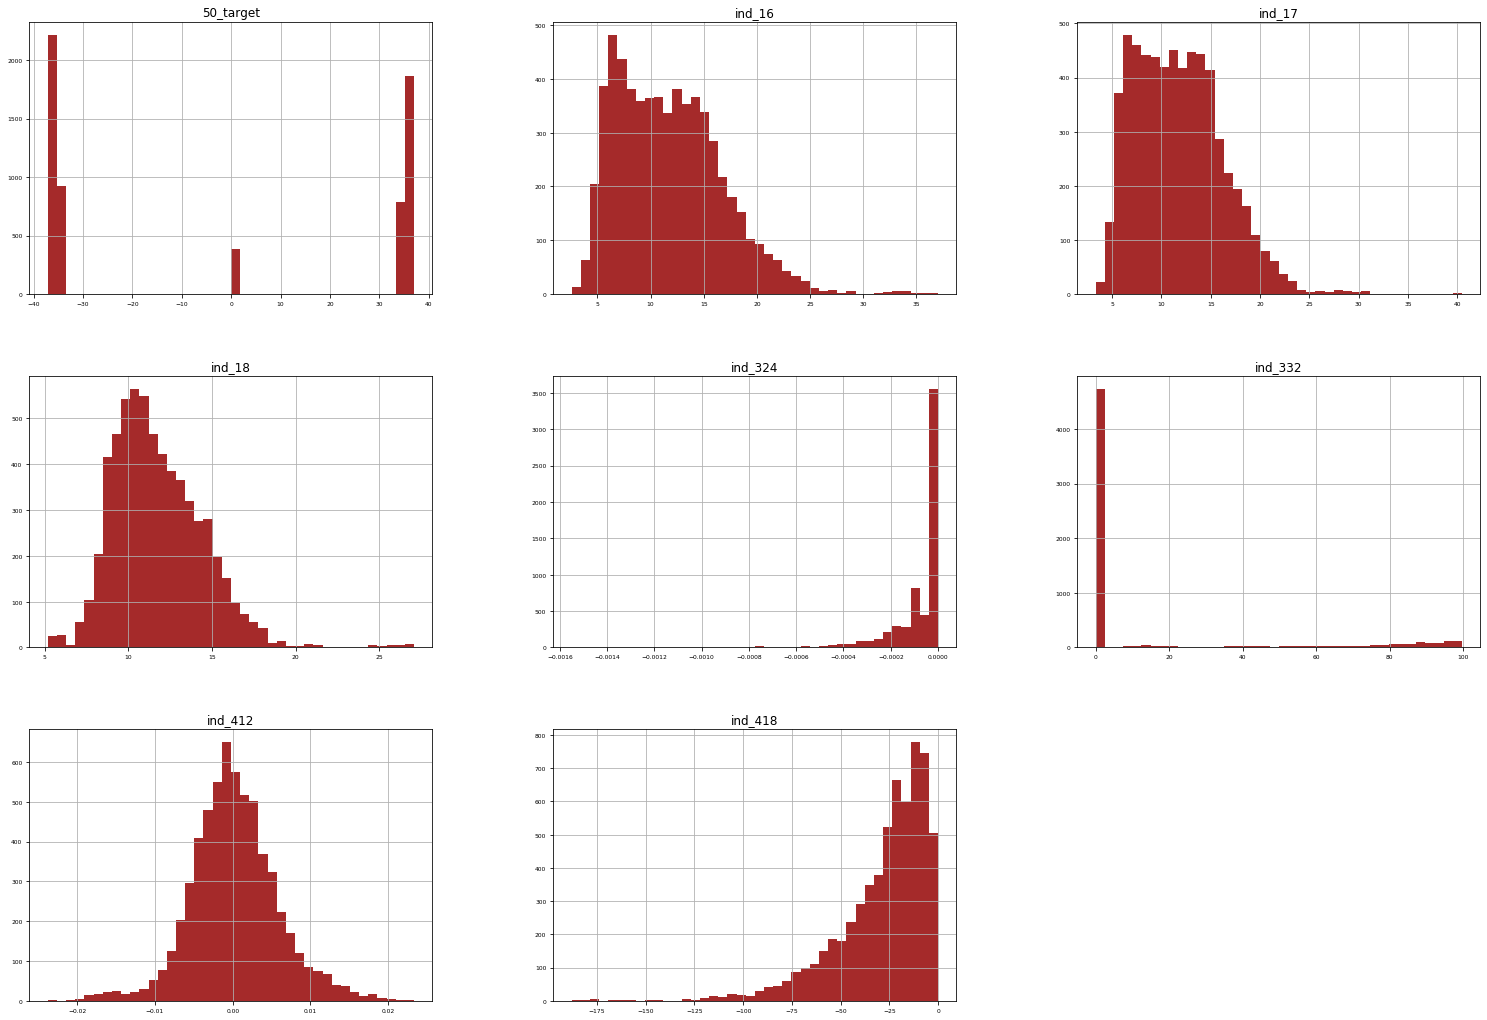

In [23]:
new_data.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6,color="brown")
plt.show()

#Dağılımlara bakarak ind_412 değişkeninin normalliğinden şüphelendik ve shapiro normallik testi yaptık.

# İstatiksel Testler

In [24]:
class statistic():
    def __init__(self, data):
        self.data=data  
    def shapiro(self):
        for col in self.data.columns[1:]:
            if self.data[col].dtypes != object :
                stat, p = shapiro(self.data[col]) 
    def Delete_col(self, inplace):
        del_col = self.data.dropna(axis=1, inplace=inplace)
        return del_col  
    def Delete_row(self, inplace):
        del_row = self.data.dropna(axis=0, inplace=inplace)
        return del_row
    def levene(self, col_1, col_2):
        stats.levene(self.data[col_1],self.data[col_2])
        print('Statistics=%.3f, p=%.3f' % (stat,p))             
    def ttest_one(self,column,popmean):
        stat, p = self.stats.ttest_one(self.data[column], popmean = popmean)
        print("Statistics:%3.3f, p=%.3f " % (stat,p))      
    def ttest_two(self, col_1, col_2):
        columns = pd.concat([self.data[col_1],self.data[col_2]], axis=1)
        stat, p=stats.ttest_ind(columns[col_1],columns[col_1], equal_var = False )
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        

In [25]:
import statsmodels.api as sm
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as stats
import pylab 
from scipy.stats import shapiro

In [26]:
stat, p = stats.shapiro(df["ind_412"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:0.985, p=0.000 
örneklem normal dağılımdan gelmemektedir. (reject H0)


In [27]:
stat, p = stats.shapiro(df["50_target"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:0.692, p=0.000 
örneklem normal dağılımdan gelmemektedir. (reject H0)


In [28]:
stats.levene(df["50_target"], df["ind_412"])  #Varyansların eşit olup olmadığını anlamak için.

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)")
else:
  print("İki değişkenin varyansı birbirine eşit değildir. (reject H0)")

Statistics:0.692, p=0.000 
İki değişkenin varyansı birbirine eşit değildir. (reject H0)


In [29]:
#Ortalamalar arasında anlamlı bir fark olup olmadığına baktık.
stats.ttest_ind(df['50_target'],df['ind_412'],equal_var=True) 

#H0 : İki değişkenin ortalamaları arasında anlamlı bir fark vardır.(Fail to reject)
#H1 : İki değişkenin ortalamaları arasında anlamlı bir fark yoktur.(Reject)

Ttest_indResult(statistic=-6.604632042359823, pvalue=4.148655478019836e-11)

*** Stat değeri > p-value -- H0 hipotezi reddedilir. (Reject) Stat değeri < p-value -- H0 hipotezi kabul edilir.(Do not reject)

*H0 hipotezi reddedilir. İki değişkenin ortalamaları arasında anlamlı bir fark yoktur.

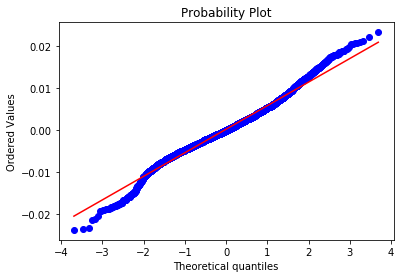

In [30]:
stats.probplot(new_data["ind_412"], dist = "norm", plot=pylab)
pylab.show()

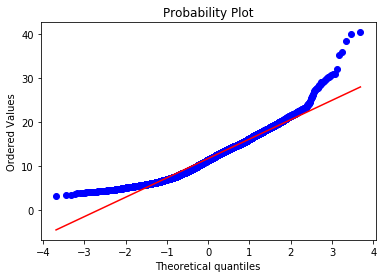

In [31]:
stats.probplot(new_data["ind_17"], dist = "norm", plot=pylab)
pylab.show()

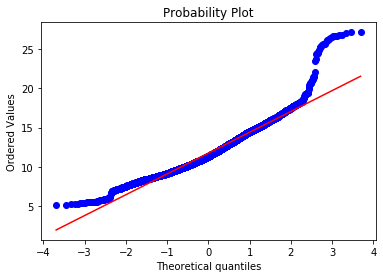

In [32]:
stats.probplot(new_data["ind_18"], dist = "norm", plot=pylab)
pylab.show()

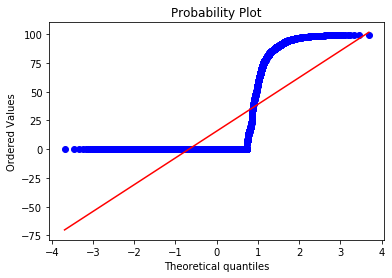

In [33]:
stats.probplot(new_data["ind_332"], dist = "norm", plot=pylab)
pylab.show()

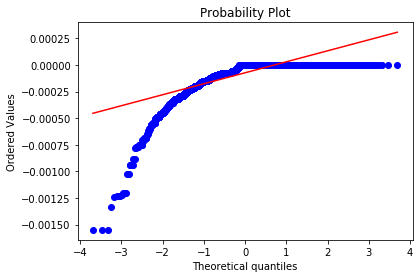

In [34]:
stats.probplot(new_data["ind_324"], dist = "norm", plot=pylab)
pylab.show()

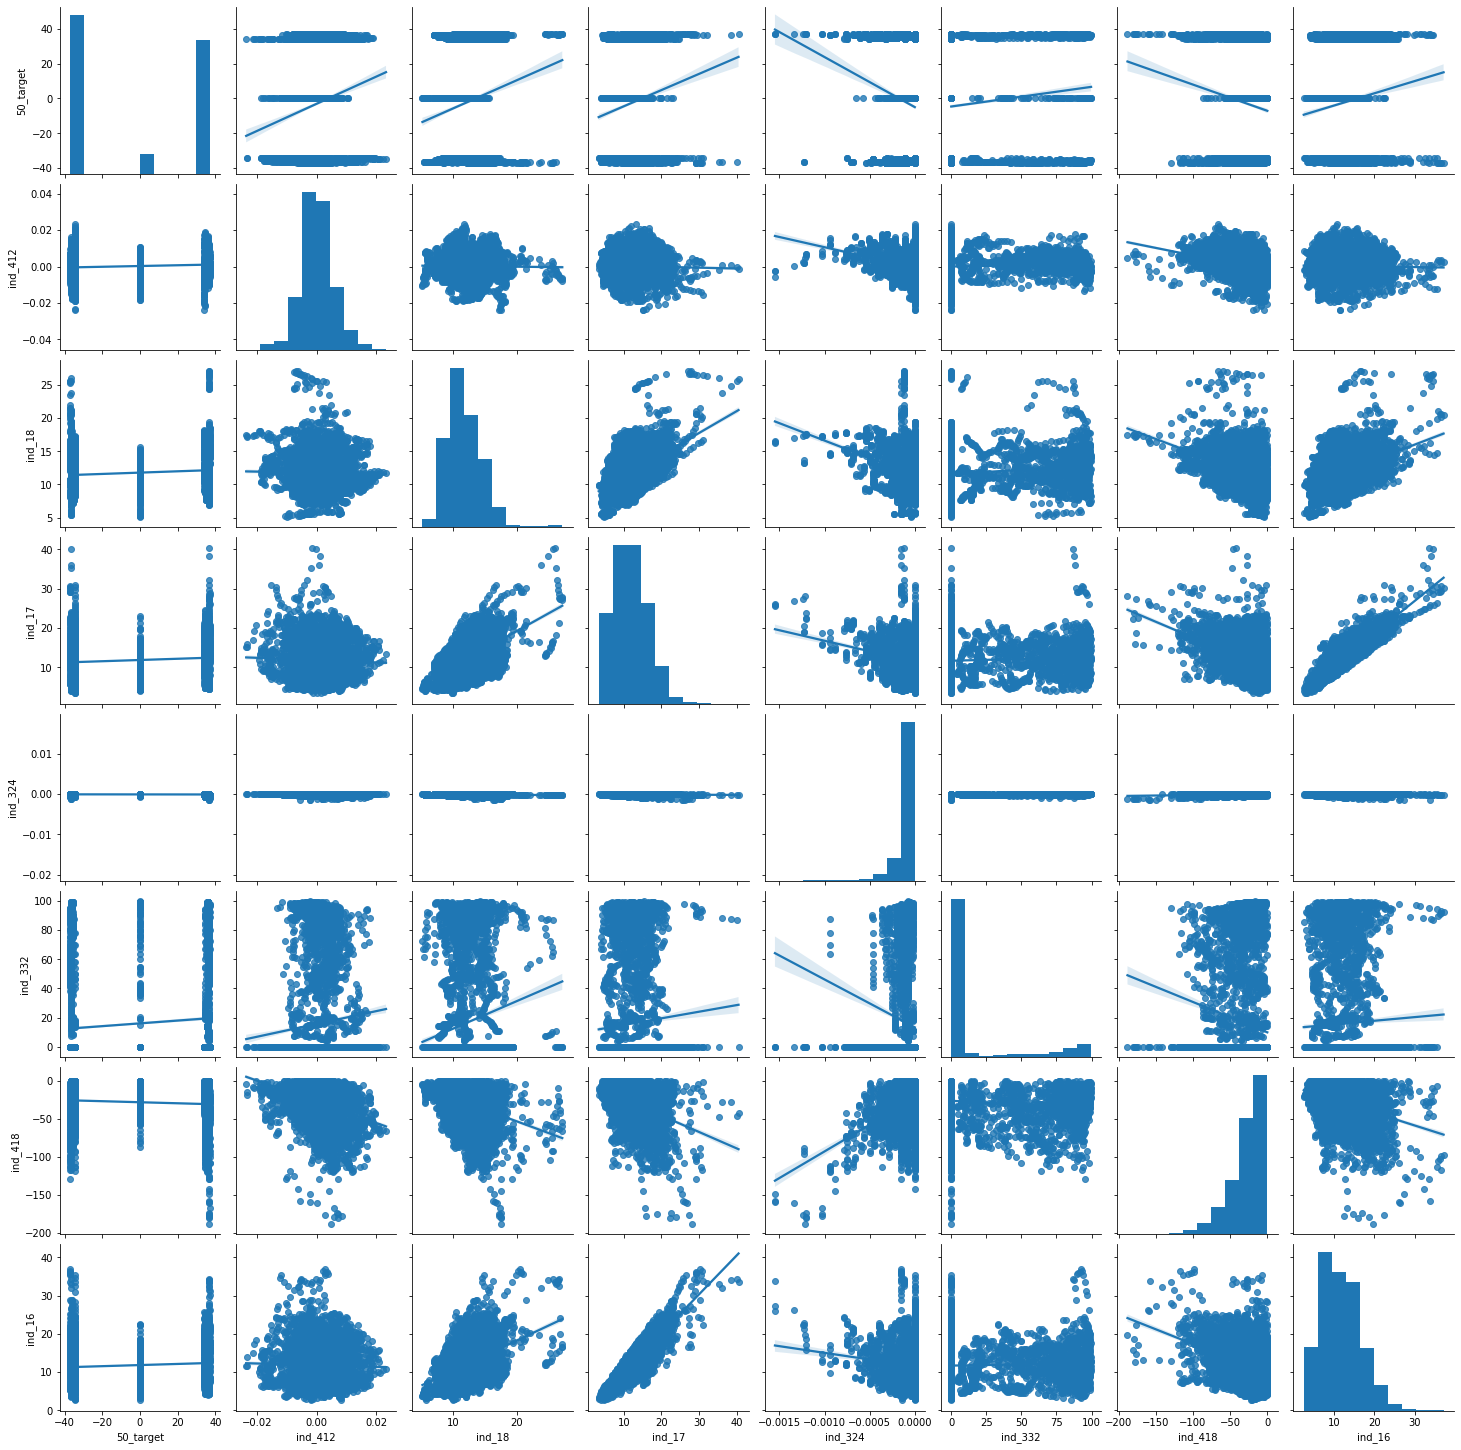

In [35]:
sns.pairplot(new_data,kind="reg")

# ANOVA Test

In [133]:
import pandas as pd
from scipy.stats import f_oneway

In [134]:
data = pd.read_excel("data.xlsx")

In [135]:
A = pd.DataFrame([15.13580245,15.14334821,15.14686957,15.15328347,-15.17906484,-15.17692688,-15.17629806,-15.17290247,-15.16497941,-15.16736891,-15.16925535,-15.16648857,-15.16258992,-15.14963635,15.13919804,15.13102346,15.14636652,15.14938483,15.15227737,15.14963635])
B = pd.DataFrame([35.62525217,35.64301269,35.65130094,0,-35.7270792,-35.72204705,-35.720567,-35.71257476,-35.69392621,-35.69955038,-35.70399051,-35.69747831,-35.68830204,-35.65781313,0,0,-35.65011691,-35.65722112,-35.66402932,-35.65781313])
C = pd.DataFrame([36.99775274,37.01619751,-37.02480507,-37.04048313,-37.10350276,-37.09827674,-37.09673968,-37.08843953,-37.06907252,-37.07491337,-37.07952456,-37.07276148,-37.06323168,-37.03156815,-37.00605289,0,-37.02357542,-37.03095333,-37.03802382,-37.03156815])
dfs=[A,B,C]

In [136]:
ABC= pd.concat(dfs, axis =1)
ABC.columns = ["A","B","C"]
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
A,20.0,-0.011916,15.550381,-15.179065,-15.167841,-0.009306,15.146492,15.153283
B,20.0,-19.636647,27.077841,-35.727079,-35.700660,-35.660921,0.000000,35.651301
C,20.0,-27.797977,23.652741,-37.103503,-37.076066,-37.039253,-37.024498,37.016198


In [137]:
ABC

,A,B,C
0,15.135802,35.625252,36.997753
1,15.143348,35.643013,37.016198
2,15.146870,35.651301,-37.024805
3,15.153283,0.000000,-37.040483
4,-15.179065,-35.727079,-37.103503
5,-15.176927,-35.722047,-37.098277
6,-15.176298,-35.720567,-37.096740
7,-15.172902,-35.712575,-37.088440
8,-15.164979,-35.693926,-37.069073
9,-15.167369,-35.699550,-37.074913


In [138]:
from scipy.stats import shapiro

In [139]:
for i in range(len(ABC.columns)):

    stat, p = shapiro(ABC.iloc[:,i])
    print(str(ABC.columns[i])+" için: ")
    print('Alanı Veren Nokta = %.3f, p = %.3f' % (stat,p))

    #interpret

    alpha=0.05
    if p> alpha:
        print(" Örneklem Normal (Gaussian) dağılımdan gelmektedir (fail to Reject)")
    else:
        print(" Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0) ")

A için: 
Alanı Veren Nokta = 0.642, p = 0.000
 Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0) 
B için: 
Alanı Veren Nokta = 0.624, p = 0.000
 Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0) 
C için: 
Alanı Veren Nokta = 0.441, p = 0.000
 Örneklem Normal (Gaussian) dağılımdan gelmemektedir (Reject H0) 


In [140]:
from scipy.stats import f_oneway

In [141]:
f_oneway(ABC['A'],ABC['B'],ABC['C'])

F_onewayResult(statistic=7.975377614677815, pvalue=0.0008832513407913505)

###Sonuca göre bulunan değer p değerinden büyüktür.Bu da modeli reddetmemizi sağlar.

In [ ]:
class supervised(model):
    def regression():
    def classification():
        
class unsupervised(model):
    def clustering():

class GridsearchCV(): # results of the model 

# Linear Regression

In [36]:
df= pd.read_excel("data.xlsx")

In [37]:
X= df[["ind_412","ind_18","ind_17","ind_324","ind_332","ind_418","ind_16"]]    # bağımlı değişken
X[0:5]

,ind_412,ind_18,ind_17,ind_324,ind_332,ind_418,ind_16
0,0.002371,9.1100,12.060000,-0.000062,20.967742,-54,11.73
1,0.003074,9.2225,11.326667,-0.000062,20.800000,-60,12.22
2,0.003561,9.3125,10.973333,-0.000062,20.634921,-60,12.28
3,0.004366,9.4150,10.426667,-0.000062,20.472441,-65,12.61
4,0.004198,9.8925,11.406667,-0.000062,20.312500,-86,14.25


In [38]:
X=sm.add_constant(X)

In [39]:
y=df[["50_target"]]  # response variable
y[0:5]

,50_target
0,35.625252
1,35.643013
2,35.651301
3,0.000000
4,-35.727079


In [40]:
lm=sm.OLS(y,X)     # Modeli kurma
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     41.75
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           6.97e-58
Time:                        15:55:29   Log-Likelihood:                -30455.
No. Observations:                6167   AIC:                         6.093e+04
Df Residuals:                    6159   BIC:                         6.098e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.0384      1.969    -11.192      0.000     -25.899     -18.178
ind_412      760.3794     84.029      9.049      0.000     595.653     925.106
ind_18         0.8350      0.201      4.149      0.000       0.441       1.230
ind_17         0.8312      0.278      2.994      0.003       0.287       1.376
ind_324    -1.265e+04   3643.516     -3.473      0.001   -1.98e+04   -5512.106
ind_332        0.0827      0.014      5.971      0.000       0.056       0.110
ind_418        0.0499      0.023      2.131      0.033       0.004       0.096
ind_16        -0.1253      0.230     -0.545      0.586      -0.576       0.325
==============================================================================
Omnibus:                    26083.064   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              789.561
Skew:                           0.131   Prob(JB):                    3.54e-172
Kurtosis:                       1.267   Cond. No.                     3.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-22.0384,1.969,-11.192,0.000,-25.899,-18.178
ind_412,760.3794,84.029,9.049,0.000,595.653,925.106
ind_18,0.8350,0.201,4.149,0.000,0.441,1.230
ind_17,0.8312,0.278,2.994,0.003,0.287,1.376
ind_324,-1.265e+04,3643.516,-3.473,0.001,-1.98e+04,-5512.106
ind_332,0.0827,0.014,5.971,0.000,0.056,0.110
ind_418,0.0499,0.023,2.131,0.033,0.004,0.096
ind_16,-0.1253,0.230,-0.545,0.586,-0.576,0.325


In [42]:
model.f_pvalue

6.970686972837003e-58

In [43]:
model.conf_int()

,0,1
const,-25.898562,-18.178221
ind_412,595.653007,925.105854
ind_18,0.440511,1.229546
ind_17,0.286876,1.375514
ind_324,-19797.234248,-5512.105891
ind_332,0.055555,0.109866
ind_418,0.003994,0.095771
ind_16,-0.575981,0.325433


In [44]:
model.fittedvalues[0:5]

0   -4.250667
1   -4.606307
2   -4.475751
3   -4.536794
4   -4.717559
dtype: float64

In [45]:
y[0:5]

,50_target
0,35.625252
1,35.643013
2,35.651301
3,0.000000
4,-35.727079


In [46]:
X['ind_412'][0:5]

0    0.002371
1    0.003074
2    0.003561
3    0.004366
4    0.004198
Name: ind_412, dtype: float64

In [47]:
y_predicted=[]
for i in range(len(y)):
    y_predicted.append(X['ind_412'][i]*float(model.params[1])+float(model.params[0]))

In [48]:
y_predicted[0:5]

[-20.23519358805953,
 -19.700679544608818,
 -19.3304165827376,
 -18.718473101861008,
 -18.846327861611694]

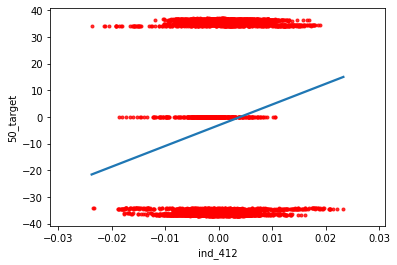

In [49]:
g = sns.regplot(df['ind_412'],df['50_target'], ci=None, scatter_kws={'color':'red','s':9})
g.set_ylabel('50_target')
g.set_xlabel('ind_412')
fig = g.get_figure()
fig.savefig("output.png")

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
X = df[['ind_412']]
y= df['50_target']

In [52]:
reg = LinearRegression()
model= reg.fit(X,y)

In [53]:
model.intercept_

-3.0802611305832257

In [54]:
model.coef_[0]

776.9121351827604

In [55]:
model.score(X,y)

0.016188589237305262

In [56]:
prediction=model.predict(X)
prediction[0:10]

array([-1.23785673, -0.69172091, -0.31340743,  0.31184136,  0.18120669,
        1.11100659,  1.38596356,  0.8907419 ,  0.13230473,  0.10143568])

In [57]:
error_df=prediction-y

In [58]:
error_arr=error_df.values

In [59]:
error_df.var()

1175.0429350508957

In [60]:
error_df.abs().mean()

33.103797261077915

In [61]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import numpy as np
import pandas as pd

In [62]:
k_t = pd.DataFrame({'gercek_y':y[0:10],'tahmin_y':reg.predict(X)[0:10]})

In [63]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,35.625252,-1.237857,36.863109
1,35.643013,-0.691721,36.334734
2,35.651301,-0.313407,35.964708
3,0.000000,0.311841,-0.311841
4,-35.727079,0.181207,-35.908286
5,-35.722047,1.111007,-36.833054
6,-35.720567,1.385964,-37.106531
7,-35.712575,0.890742,-36.603317
8,-35.693926,0.132305,-35.826231
9,-35.699550,0.101436,-35.800986


In [64]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,35.625252,-1.237857,36.863109,1358.888798
1,35.643013,-0.691721,36.334734,1320.212866
2,35.651301,-0.313407,35.964708,1293.460248
3,0.000000,0.311841,-0.311841,0.097245
4,-35.727079,0.181207,-35.908286,1289.404996
5,-35.722047,1.111007,-36.833054,1356.673840
6,-35.720567,1.385964,-37.106531,1376.894610
7,-35.712575,0.890742,-36.603317,1339.802790
8,-35.693926,0.132305,-35.826231,1283.518824
9,-35.699550,0.101436,-35.800986,1281.710603


In [65]:
np.sum(k_t["hata_kare"])

11900.664819668971

In [66]:
lm= sm.OLS(y,X) 
model = lm.fit()

In [67]:
influence = model.get_influence()
influence

In [68]:
import seaborn as sns

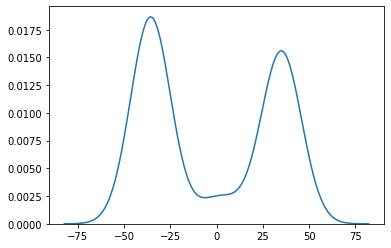

In [69]:
### Residual yani artık değerler için normalite testlerinin yapılması.
#Model residuallarından tahmin ettiklerimizi getirmesini istedik.
advres = pd.concat([df, pd.Series (model.resid, name= 'resid'), pd.Series (model.predict() , name= "predict")] ,axis=1)
sns.kdeplot (np.array (advres.resid), bw=10)


In [70]:
model.resid

0       33.833818
1       33.320552
2       32.960993
3       -3.298259
4      -38.898318
          ...    
6162   -38.036324
6163   -40.967215
6164   -41.247373
6165   -41.351345
6166   -41.144332
Length: 6167, dtype: float64

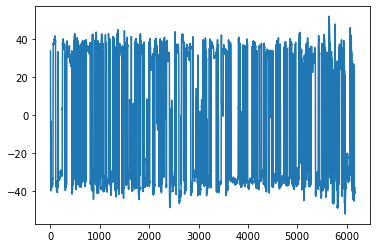

In [71]:
plt.plot(model.resid)

In [72]:
print (np.sum(k_t['hata_kare']))
print (np.mean(k_t['hata_kare']))
print (np.average(((k_t['hata']).abs())))
print (np.sqrt(np.mean(k_t['hata_kare'])))

11900.664819668971
1190.066481966897
32.75527959777645
34.49734021583254


# * Multiple Regression

In [28]:
import pandas as pd
ad = pd.read_excel("data.xlsx" , usecols = [133,134,135])
df = ad.copy()

In [29]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict
X = df.drop("50_target" , axis = 1)
y = df["50_target"]

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)

In [30]:
X_train.shape

(4933, 2)

In [31]:
X_test.shape

(1234, 2)

In [32]:
y_train.shape

(4933,)

In [33]:
y_test.shape

(1234,)

In [34]:
lm = sm.OLS(y_train , X_train)

In [35]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.044e+04
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                        0.00
Time:                        17:40:34   Log-Likelihood:                         -18998.
No. Observations:                4933   AIC:                                  3.800e+04
Df Residuals:                    4931   BIC:                                  3.801e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
20_target      0.1300      0.012     11.105      0.000       0.107       0.153
90_target      0.8657      0.005    184.370      0.000       0.856       0.875
==============================================================================
Omnibus:                     1233.262   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63346.912
Skew:                           0.328   Prob(JB):                         0.00
Kurtosis:                      20.543   Cond. No.                         2.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
influence = model.get_influence()
influence

In [37]:
resid_student = influence.resid_studentized_external

Leverage vs studentized residuals


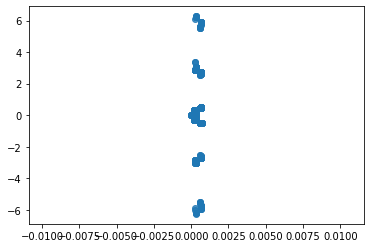

In [38]:
(cooks, p) =influence.cooks_distance
(dffits,p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs studentized residuals")
sns.regplot(leverage , model.resid_pearson , fit_reg = False)

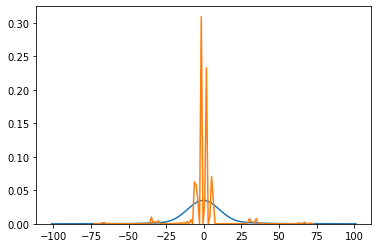

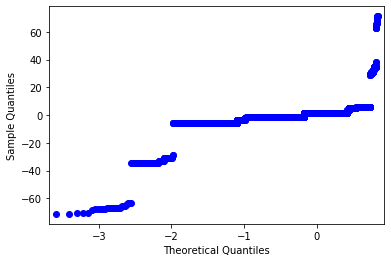

In [39]:
advres = pd.concat([ad , pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)

sns.kdeplot(np.array(advres.resid), bw=10)
sns.distplot(np.array(advres.resid), hist=False)

sm.qqplot(advres.resid)
plt.show()

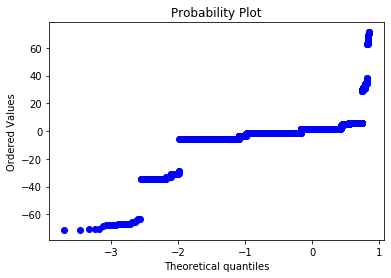

Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


In [40]:
import pylab
stats.probplot(advres.resid, dist="norm", plot=pylab)
pylab.show()
from scipy.stats import shapiro

stat, p =shapiro(advres.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

#Multicollinearity : İçeriye birbiriyle çok ilişkili olan veriler koyunca modeller bazen yanlış olabilir.Bunu kontrol etmek için VIF Değeri kullanırız.(Variance inflation factor)

In [41]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif    # bu rakamların 10 altında olmasını istiyoruz.

[1.1440670901365326, 1.144067090136533]

# Principle Component Analysis (PCA)

Modelleme yaparken sürekli bağımsız değişkenlerin sayısını düşürmek amacıyla kullanılır.Özellikle doğrusal modellemede fazla değişken kullanmak tahmin gücünü zayıflatmaktadır.Bunun nedeni değişken sayısı arttıkça bağımsız değişkenler arası korelasyonun yüksek çıkmasıdır.(Multicollinearity)

***PCA ile p tane bağımsız değişken k tane uncorrelated değişkene dönüştürülür.

***Önce correlated veriler datadan elenip kalan verilere PCA yapılabilir.

In [73]:
col=df.columns

num_cols=df._get_numeric_data().columns
cat=set(col)-set(num_cols)
cat

{'ind_109', 'ind_420', 'ind_422'}

In [74]:
df['ind_109'].unique()  #Bu değişkenin kategorik olduğu kanıtlandı.

array(['GREEN', 'RED'], dtype=object)

In [75]:
df["ind_109"].value_counts()

GREEN    3132
RED      3035
Name: ind_109, dtype: int64

In [76]:
cat = df.select_dtypes(include='object')
cat  #ind_109 değişkeni kategorik bir değişkendir.

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388
...,...,...,...
6162,RED,-11,-270
6163,RED,-12,-271
6164,GREEN,-21,-280
6165,GREEN,-33,-292


ind_109 değişkeni object olduğu için numeric hale gelmelidir.Ona PCA yapabiliriz veya datadan atmak gerekir.

ind_420 ve ind_422 değişkeni de object.Datadan atabiliriz.

50_target,90_target ve 20_target target değişkendir.Bunları ve diğer değişkenlerle ilişkisini tahmin etmeye çalışıyoruz.

In [77]:
dms = pd.get_dummies(df[["ind_109", "ind_420", "ind_422"]])
dms.head()

,ind_109_GREEN,ind_109_RED,ind_420_-349,ind_420_-346,ind_420_-340,ind_420_-330,ind_420_-327,ind_420_-326,ind_420_-323,ind_420_-322,...,ind_422_111,ind_422_112,ind_422_113,ind_422_114,ind_422_115,ind_422_117,ind_422_118,ind_422_119,ind_422_124,ind_422_?
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
dms = pd.get_dummies(df[["ind_109", "ind_420", "ind_422"]])
dms.head()
y=df["50_target"]
X=df.drop(["50_target","20_target","90_target","ind_109","ind_420","ind_422"], axis=1 ).astype("float64")
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522


In [79]:
X=df.drop(["50_target","20_target","90_target","ind_109","ind_420","ind_422","ind_5","ind_6","ind_8","ind_10","ind_12","ind_412","ind_414","ind_418","ind_426","ind_428","ind_13","ind_17","ind_18","ind_332","ind_16"], axis=1 ).astype("float64")
X.head()

,ind_9,ind_14,ind_15,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,...,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_416,ind_424
0,85.714286,23.80,17.62,2.0,15.0,13.0,1.0,56.0,0.002690,-0.002670,...,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44.0,-23.0,-27.0,-49.6,1.0
1,78.571429,11.45,18.16,0.0,11.0,11.0,1.0,63.0,0.002729,-0.003111,...,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48.0,-16.0,-31.0,-55.6,1.0
2,71.428571,8.75,17.86,5.0,15.0,9.0,-1.0,65.0,0.002780,-0.003530,...,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48.0,-10.0,-30.0,-58.4,1.0
3,64.285714,7.80,14.76,11.0,18.0,8.0,0.0,68.0,0.002679,-0.003961,...,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51.0,-10.0,-30.0,-61.8,1.0
4,57.142857,14.90,11.92,13.0,23.0,10.0,10.0,91.0,0.003986,-0.004624,...,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70.0,-24.0,-45.0,-79.8,1.0


#Hedef değişkene PCA yapılamadığı için datasetinden çıkarıyoruz.(50_target,20_target,90_target)

#Tüm kategorik verileri dummy aracılığıyla çevirdik.Bunları da veri setinden çıkardık.

#Kalan integer değişkenleri float hale dönüştürdük.

*Ana amaç: *1)Kategorik değişkenler dummy yapılacak. *2)Numerikleri bulmak için hedef değişken ve dummy veri setinden atılır. *3)Sonra dummy yaptıklarımızı numeriklerle birleştirip ana bir x veriseti kuracağız.

In [80]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
training = df.copy()
print("training", training.shape)

#115 tane x'im var.

X_train (4625, 115)
X_test (1542, 115)
y_train (4625,)
y_test (1542,)
training (6167, 136)


In [81]:
pca=PCA()

In [82]:
X_reduced_train= pca.fit_transform(scale(X_train))
#PCA'i fit et içine scale ettiğim x değerlerimi koy. Normalization yapıyorum çünkü birbirine dik olan doğrular bulmaya çalışıyorum.
#Datalarımın aynı scale yani düzlemde oluşu PCA gücünü arttıracaktır.

X_reduced_train[0:1,:]

#Yeni reduced edilmiş bir x datasetim oldu.

array([[ 7.96932443e+00, -4.81854975e+00,  1.17774049e+00,
         6.31341220e-01,  1.59402526e+00, -1.91183075e+00,
        -1.27869946e+00,  9.74204307e-02, -1.79012643e+00,
        -5.76634242e-03,  6.96577448e-01,  9.19502363e-01,
         2.38961998e-01,  2.32030094e-01, -5.65499928e-02,
        -1.51137555e+00,  4.91357500e-01,  1.65060380e+00,
         1.00692342e-01, -9.24737534e-01,  1.04164159e+00,
        -1.09929279e+00, -1.11313175e+00,  7.29350882e-01,
         9.93764245e-02, -8.67607005e-01, -8.42876253e-01,
         5.17964848e-02, -3.39526731e-01,  1.07930461e+00,
        -1.48704387e-01,  4.56951591e-01,  1.02088227e+00,
         6.71938471e-01, -6.14379087e-01,  8.52045398e-01,
         1.40792301e-02, -5.05431152e-01,  3.70227891e-01,
         2.77678837e-01,  2.88773709e-01,  3.53976687e-01,
         8.95638973e-01,  4.04789242e-02,  1.81090571e-02,
         1.73202476e-02, -3.83539380e-01, -2.71042838e-02,
        -1.82059760e-01,  7.92656801e-02,  7.49250708e-0

***Buradaki asıl amacımız; maksimum varyansı sağlayan yani datanın içindeki maksimum açıklayıcılığı bulabildiğimiz component sayısını belirlemek.



In [83]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
#explained variance: PCA yaptığım datamın içinde ,her bir component da datamın ne kadar açıkladığını bize gösterir.

array([ 36.35,  49.49,  55.83,  59.53,  62.83,  65.86,  68.82,  70.98,
        72.82,  74.51,  76.13,  77.69,  79.13,  80.46,  81.72,  82.9 ,
        83.94,  84.91,  85.8 ,  86.67,  87.46,  88.22,  88.92,  89.58,
        90.21,  90.8 ,  91.35,  91.88,  92.36,  92.84,  93.31,  93.73,
        94.12,  94.48,  94.82,  95.14,  95.45,  95.72,  95.97,  96.21,
        96.43,  96.65,  96.86,  97.06,  97.24,  97.41,  97.58,  97.74,
        97.88,  98.02,  98.15,  98.27,  98.38,  98.48,  98.58,  98.67,
        98.76,  98.85,  98.93,  99.01,  99.08,  99.15,  99.21,  99.27,
        99.32,  99.37,  99.42,  99.46,  99.5 ,  99.54,  99.58,  99.62,
        99.66,  99.69,  99.72,  99.75,  99.78,  99.8 ,  99.82,  99.84,
        99.86,  99.88,  99.89,  99.9 ,  99.91,  99.92,  99.93,  99.94,
        99.95,  99.96,  99.97,  99.98,  99.99, 100.  , 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
      

#Bunu şu şekilde yorumlayabiliriz: *İlk component verisetimin %36.3 ünü açıklar, ikinci component %50 sini açıklar.Burada sondaki componentlar veriyi çok iyi açıklıyor.Neredeyse %100 oranında. ???

In [84]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([36.35, 49.49, 55.83, 59.53, 62.83])

#1.component verisetinde bulunan varyansın %37 sini açıklıyor.

#2.component birinci ile birlikte verisetinde bulunan varyansın %50 sini açıklıyor.

([<matplotlib.axis.XTick at 0x1e731ad8308>,
 <a list of 115 Text xticklabel objects>)

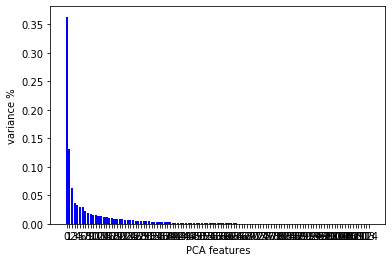

In [85]:
import matplotlib.pyplot as plt

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
def pca_fon(X, threshold):   #Datamın yüzde 70 oranında açıklayıcılığı olmasını istersem,kaç component kullanmam gerektiğini gösteren kod.
    pca = PCA()
    X_pca = pca.fit_transform(scale(X))
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('pca sonrası değişken sayısı: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

df_pca=pca_fon(df, 0.70)

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
lm = LinearRegression()
pca.n_components_

115

In [89]:
regression = lm.fit(X_reduced_train,y_train)

In [90]:
y_pred = regression.predict(X_reduced_train)

In [91]:
rscore =[]
RMSE = []
for i in range (1,115):
    pca = PCA(n_components = i)
    X_reduced_train = pca.fit_transform(scale(X_train))
    lm = LinearRegression()
    regression = lm.fit(X_reduced_train,y_train)
    y_pred = regression.predict(X_reduced_train)
    rscore.append(r2_score(y_train, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_train,y_pred)))

Text(0.5, 0, 'Component Sayısı')

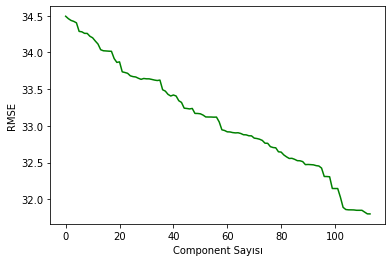

In [92]:
plt.plot(RMSE,color="green")
plt.ylabel('RMSE')
plt.xlabel("Component Sayısı")

Text(0.5, 0, 'Component Sayısı')

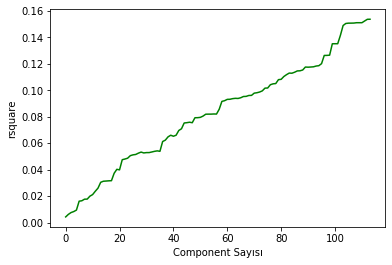

In [93]:
plt.plot(rscore,color="green")
plt.ylabel('rsquare')
plt.xlabel("Component Sayısı")

# Train Datası

In [94]:
pca = PCA(n_components = 110)
X_reduced_train = pca.fit_transform(scale(X_train))
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train,y_train)

In [95]:
pcr_model.intercept_

-2.911841468918921

In [96]:
pcr_model.coef_  #Her bir component değerim yani 1.component=-0.34 gibi.

array([-3.48483833e-01,  3.88735326e-01,  4.77126867e-01,  4.56972666e-01,
       -5.96994753e-01, -1.51699629e+00,  3.36726187e-01,  7.61786434e-01,
        1.55059062e-01,  1.18419774e+00,  8.94075363e-01, -1.22282332e+00,
       -1.36601651e+00,  1.84149439e+00,  8.26505102e-01, -5.41517944e-01,
        2.62070583e-01, -8.90638175e-02, -2.60113170e+00,  1.75580085e+00,
       -3.04061054e-01, -3.19130002e+00, -1.02737238e+00,  7.78700178e-01,
       -1.98000704e+00,  2.90696898e-01,  6.92819459e-01,  1.31981041e+00,
       -9.38291719e-01, -8.21355287e-03, -7.24920888e-01,  1.16854038e-01,
       -1.33665459e+00,  4.25566779e-01,  9.20591189e-01,  4.79094256e-01,
        5.17274300e+00,  1.84152155e+00,  2.36604240e+00,  2.78108294e+00,
        1.10467351e-01, -4.56032073e-01,  4.04527022e+00,  3.17152802e+00,
        4.74154573e+00,  1.34009676e+00, -1.84251357e+00, -1.63036741e+00,
       -4.71410367e+00,  1.15133250e+00,  1.08751601e+00, -2.55793528e+00,
        3.68957358e+00,  

#1.component 1 arttığında 50_target 3.48 düşüyor.

#2.component 1 arttığında 50_target 3.88 artıyor.

#Prediction yapıyorsam PCA kullanmak mantıklı ama modeldeki x değerlerini tek tek açıklayacaksak black box kullanmalıyız.PCA yetersiz kalabilir.

In [97]:
y_pred = pcr_model.predict(X_reduced_train) 
y_pred[0:110]

#PCA den çıkan x değerlerimi y değerine predict ediyorum.50_target değerini tahmin ediyorum.

array([ 1.59123266e+00,  7.44869196e-01,  1.12915229e+01, -3.73042462e+00,
        4.66763047e+00, -1.91569787e+01,  1.80593609e+01, -2.50220115e+01,
       -1.88231092e+01,  2.71324177e+01,  1.08819860e+01,  5.81330917e+00,
        2.35620427e+01, -1.45775898e+01, -7.24118064e+00,  1.53422622e+01,
        1.55252949e+00,  8.60473920e+00, -1.57796431e+01, -5.86966569e+00,
       -9.82714195e+00, -1.59029646e+01,  1.34780952e+01,  7.18603760e+00,
       -2.29124927e+01, -7.18187765e+00, -7.45566862e+00,  3.11646236e+00,
       -4.26374495e+00,  1.74028496e+01,  3.15222574e+00, -3.57631952e-02,
       -1.83306050e+01,  2.46427277e+00,  8.42086597e+00, -1.54548020e+01,
        7.73230934e+00, -6.35918132e+00,  6.49199439e+00, -1.31552376e+01,
        4.68650501e+00,  3.94055623e-01, -6.05776499e+00, -5.88984604e+00,
       -4.30094011e+00, -2.85403578e+00, -1.95478030e+01,  1.10873160e+01,
       -2.19983034e+01, -2.71745068e+00,  8.49328287e+00, -1.00968048e+01,
        3.23294480e+00, -

In [98]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_train,y_pred))

31.848623803253524

In [99]:
r2_score(y_train,y_pred)  #Modelin r2 değerine baktığımızda ,açıklayıcılığı düşüktür.

0.1511165058814159

In [100]:
df["50_target"].mean()

-2.9063582899740608

# Test Datası

In [101]:
pca2 = PCA(n_components=110)

X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)

np.sqrt(mean_squared_error(y_test,y_pred))

37.40686667464177

In [102]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:110] ,y_train)
pcr_model.intercept_
pcr_model.coef_

array([-3.48483833e-01,  3.88735326e-01,  4.77126867e-01,  4.56972666e-01,
       -5.96994753e-01, -1.51699629e+00,  3.36726187e-01,  7.61786434e-01,
        1.55059062e-01,  1.18419774e+00,  8.94075363e-01, -1.22282332e+00,
       -1.36601651e+00,  1.84149439e+00,  8.26505102e-01, -5.41517944e-01,
        2.62070583e-01, -8.90638175e-02, -2.60113170e+00,  1.75580085e+00,
       -3.04061054e-01, -3.19130002e+00, -1.02737238e+00,  7.78700178e-01,
       -1.98000704e+00,  2.90696898e-01,  6.92819459e-01,  1.31981041e+00,
       -9.38291719e-01, -8.21355287e-03, -7.24920888e-01,  1.16854038e-01,
       -1.33665459e+00,  4.25566779e-01,  9.20591189e-01,  4.79094256e-01,
        5.17274300e+00,  1.84152155e+00,  2.36604240e+00,  2.78108294e+00,
        1.10467351e-01, -4.56032073e-01,  4.04527022e+00,  3.17152802e+00,
        4.74154573e+00,  1.34009676e+00, -1.84251357e+00, -1.63036741e+00,
       -4.71410367e+00,  1.15133250e+00,  1.08751601e+00, -2.55793528e+00,
        3.68957358e+00,  

In [103]:
y_pred = pcr_model.predict(X_reduced_train[:,0:110])
print(np.sqrt(mean_squared_error(y_train,y_pred)))

31.848623803253524


Text(0, 0.5, 'PCA 2')

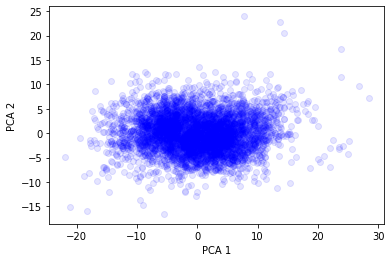

In [104]:
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0], PCA_components[1] , alpha=.1,color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

****Normalize edilmiş X değerlerimle,componentlara baktık.Burada 2 tane component değerine göre datamın dağılımna baktık.Bu bize şunu gösterir:Datamızda farklı componentlara bakarak datadaki kümelenmeleri görmemizi sağlar.Genelde en çok etkileyen componentlar seçilir.

# Tahmin & Model Tuning

In [105]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:110], y_train)

y_pred = pcr_model.predict(X_reduced_test[:,0:110])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

# Modelleme için 10 bileşen alındı. 10 yerine farklı bir rakam alınsaydı mse degeri degişecekti.

37.40686667464177


In [106]:
from sklearn import model_selection

In [107]:
cv_10 = model_selection.KFold(n_splits = 110,
                             shuffle = True,
                             random_state = 1)

In [108]:
RMSE = []

In [109]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

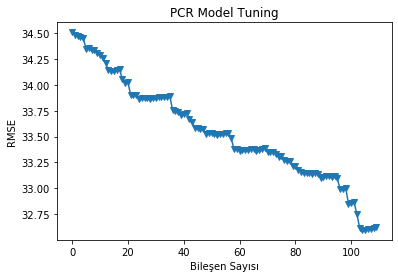

In [110]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning');

In [111]:
lm = LinearRegression()

In [112]:
pcr_model = lm.fit(X_reduced_train[:,0:110], y_train)

In [113]:
y_pred = pcr_model.predict(X_reduced_train[:,0:110])

In [114]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

31.848623803253524


In [115]:
y_pred = pcr_model.predict(X_reduced_test[:,0:110])

In [116]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

37.40686667464177


In [117]:
lm=sm.OLS(y_train,X_reduced_train)     # Modeli kurma
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.150
Model:                            OLS   Adj. R-squared (uncentered):              0.129
Method:                 Least Squares   F-statistic:                              7.246
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                    1.58e-94
Time:                        16:25:46   Log-Likelihood:                         -22589.
No. Observations:                4625   AIC:                                  4.540e+04
Df Residuals:                    4515   BIC:                                  4.611e+04
Df Model:                         110                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3485      0.074     -4.734      0.000      -0.493      -0.204
x2             0.3887      0.122      3.175      0.002       0.149       0.629
x3             0.4771      0.176      2.707      0.007       0.132       0.823
x4             0.4570      0.231      1.980      0.048       0.004       0.909
x5            -0.5970      0.244     -2.442      0.015      -1.076      -0.118
x6            -1.5170      0.255     -5.951      0.000      -2.017      -1.017
x7             0.3367      0.258      1.306      0.192      -0.169       0.842
x8             0.7618      0.302      2.522      0.012       0.170       1.354
x9             0.1551      0.327      0.474      0.636      -0.487       0.797
x10            1.1842      0.341      3.470      0.001       0.515       1.853
x11            0.8941      0.348      2.568      0.010       0.211       1.577
x12           -1.2228      0.355     -3.440      0.001      -1.920      -0.526
x13           -1.3660      0.369     -3.699      0.000      -2.090      -0.642
x14            1.8415      0.384      4.793      0.000       1.088       2.595
x15            0.8265      0.396      2.088      0.037       0.050       1.603
x16           -0.5415      0.408     -1.326      0.185      -1.342       0.259
x17            0.2621      0.435      0.602      0.547      -0.591       1.115
x18           -0.0891      0.450     -0.198      0.843      -0.972       0.794
x19           -2.6011      0.470     -5.533      0.000      -3.523      -1.679
x20            1.7558      0.476      3.685      0.000       0.822       2.690
x21           -0.3041      0.500     -0.608      0.543      -1.284       0.676
x22           -3.1913      0.509     -6.273      0.000      -4.189      -2.194
x23           -1.0274      0.531     -1.935      0.053      -2.068       0.013
x24            0.7787      0.546      1.427      0.154      -0.291       1.848
x25           -1.9800      0.561     -3.527      0.000      -3.081      -0.879
x26            0.2907      0.577      0.504      0.614      -0.841       1.422
x27            0.6928      0.597      1.161      0.246      -0.477       1.863
x28            1.3198      0.611      2.161      0.031       0.122       2.517
x29           -0.9383      0.637     -1.472      0.141      -2.188       0.311
x30           -0.0082      0.641     -0.013      0.990      -1.265       1.249
x31           -0.7249      0.650     -1.115      0.265      -1.999       0.550
x32            0.1169      0.683      0.171      0.864      -1.223       1.457
x33           -1.3367      0.714     -1.873      0.061      -2.735       0.062
x34            0.4256      0.738      0.576      0.564      -1.022       1.873
x35            0.9206      0.763      1.207      0.228      -

In [118]:
lm=sm.OLS(y_test,X_test)     # Modeli kurma
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.179
Model:                            OLS   Adj. R-squared (uncentered):              0.113
Method:                 Least Squares   F-statistic:                              2.708
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                    1.89e-17
Time:                        16:25:47   Log-Likelihood:                         -7502.5
No. Observations:                1542   AIC:                                  1.523e+04
Df Residuals:                    1427   BIC:                                  1.585e+04
Df Model:                         115                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_9          0.0523      0.042      1.231      0.218      -0.031       0.136
ind_14        -0.3063      0.304     -1.007      0.314      -0.903       0.290
ind_15         0.6251      0.390      1.604      0.109      -0.139       1.390
ind_19        -2.1179      2.279     -0.929      0.353      -6.588       2.352
ind_20         1.9190      1.906      1.007      0.314      -1.820       5.658
ind_21        -0.9273      2.321     -0.400      0.690      -5.481       3.626
ind_22         0.3137      0.605      0.518      0.604      -0.873       1.501
ind_23         0.3901      0.605      0.645      0.519      -0.796       1.577
ind_25     -1.529e+06   1.86e+06     -0.824      0.410   -5.17e+06    2.11e+06
ind_26     -1.529e+06   1.86e+06     -0.824      0.410   -5.17e+06    2.11e+06
ind_27      3.049e+06   3.71e+06      0.821      0.412   -4.23e+06    1.03e+07
ind_28        -0.0211      0.022     -0.982      0.326      -0.063       0.021
ind_29        -0.0257      0.034     -0.749      0.454      -0.093       0.042
ind_30         0.0014      0.037      0.037      0.971      -0.071       0.073
ind_31         0.0335      0.050      0.666      0.506      -0.065       0.132
ind_32         0.0360      0.047      0.759      0.448      -0.057       0.129
ind_33        -0.0019      0.045     -0.043      0.966      -0.090       0.086
ind_34         0.0029      0.053      0.054      0.957      -0.100       0.106
ind_35        -0.0157      0.042     -0.375      0.708      -0.098       0.067
ind_36        -0.0212      0.030     -0.699      0.485      -0.081       0.038
ind_37         0.1244      0.030      4.121      0.000       0.065       0.184
ind_39        -0.2057      0.146     -1.408      0.159      -0.492       0.081
ind_40        -1.8058      2.267     -0.797      0.426      -6.253       2.641
ind_41         0.0800      0.131      0.611      0.541      -0.177       0.337
ind_42        -0.4958      0.675     -0.735      0.463      -1.820       0.828
ind_43        -0.3263      0.457     -0.714      0.475      -1.223       0.570
ind_44         0.3605      0.485      0.744      0.457      -0.590       1.311
ind_45         0.0735      0.478      0.154      0.878      -0.863       1.010
ind_46        -0.0441      0.423     -0.104      0.917      -0.874       0.786
ind_47         0.4992      0.326      1.531      0.126      -0.140       1.139
ind_48         0.2790      0.326      0.855      0.393      -0.361       0.919
ind_49        -0.2541      0.267     -0.950      0.342      -0.779       0.270
ind_50         0.9806      0.223      4.395      0.000       0.543       1.418
ind_51        -0.1932      0.158     -1.226      0.221      -0.502       0.116
ind_52        -0.0907      0.810     -0.112      0.911      -

# Doğrusal Olmayan Regresyon-Finans Datası

In [123]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN 

*** EN YAKIN KOMŞU(KNN): Tahminler gözlemler benzerliğine göre yapılır.Sınıflandırma ve regresyon problemlerinde kullanılan bir algoritmadır.

***Bağımlı değişken değerini,kendisine en benzer gözlemlerine bakarak tahmin etmeye çalışılır.

In [2]:
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [6]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Burada bazı parametreler verilmiştir.Komşuluk parametresi değeri=5, farklı komşuluk sayılarına farklı değerler elde edilecektir.



In [7]:
knn_model.n_neighbors

5

In [8]:
knn_model.effective_metric_

'euclidean'

# TAHMİN

In [9]:
y_pred = knn_model.predict(X_test) 
#X test setine yönelik olarak y tahmin değerlerini gösterir.

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))  #Test hatası

21.341319517736117

In [11]:
RMSE = []       #Farklı k değerlerine karşılık tahmin değerimin nasıl değiştiğini gözlemliyorum.

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

    #Eğitim datası üzerinde hata gözlemleme işlemi yaptık.

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  10.576655411093668
k = 3 için RMSE değeri:  13.236326617796417
k = 4 için RMSE değeri:  14.914983204514881
k = 5 için RMSE değeri:  16.06547949859019
k = 6 için RMSE değeri:  17.115122761747287
k = 7 için RMSE değeri:  17.834609278634616
k = 8 için RMSE değeri:  18.36383651330056
k = 9 için RMSE değeri:  18.864628334465873
k = 10 için RMSE değeri:  19.294600110162516


# MODEL TUNING

GridSearch CV yöntemiyle optimum k sayısını belirlemeye çalıştığımız bölüm. 

Bir olası veri seti verilip,tüm olası kombinasyonlarının denenmesi anlamındadır.İki parametre olursa birbiriyle çarpıştırılarak (cross validation) kombinasyonlar bulunur.

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [14]:
np.arange(1,30,1)  #1'den 30'a kadar k değerleri ürettik.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [15]:
knn = KNeighborsRegressor()

In [16]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
#KNN cross validation modelinin nesnesini tanımlamış olduk.

In [17]:
knn_cv_model.fit(X_train, y_train)
#Modeli fit ettik. Uygun olan parametreler denendi.

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
knn_cv_model.best_params_["n_neighbors"] #En uygun parametre değeri 3.

3

In [24]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  21.605578153710848
k = 2 için RMSE değeri:  10.576655411093668 RMSE_CV değeri:  20.508389728933956
k = 3 için RMSE değeri:  13.236326617796417 RMSE_CV değeri:  20.354295392665236
k = 4 için RMSE değeri:  14.914983204514881 RMSE_CV değeri:  20.67323245878391
k = 5 için RMSE değeri:  16.06547949859019 RMSE_CV değeri:  21.083571156210244
k = 6 için RMSE değeri:  17.115122761747287 RMSE_CV değeri:  21.170756180627567
k = 7 için RMSE değeri:  17.834609278634616 RMSE_CV değeri:  21.380402206148933
k = 8 için RMSE değeri:  18.36383651330056 RMSE_CV değeri:  21.665331982967565
k = 9 için RMSE değeri:  18.864628334465873 RMSE_CV değeri:  21.960144262556618
k = 10 için RMSE değeri:  19.294600110162516 RMSE_CV değeri:  22.174975176199457


*Burada RMSE değeri bize test ve train üzerinden yapılan hata karelerinin ortalamasını gösterir.10-19 arasında dağılır.

*RMSE_CV değeri ise ,Valide edilmiş model üzerinden elde edilen hatalar.Eğitim üzerinedir. Bu değer 20-22 arasında dağılmıştır. Daha doğru değerleri gösterir çünkü aralık daha dardır.

In [25]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [26]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [27]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

20.684951569847392

***Tuned edilmiş final KNN modeliyle elde edilen test hatası 20 çıktı.

# Support Vector Regression (SVR)

Destek vektör regresyonu: 
Amaç burada bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek şekilde doğru veya eğriyi belirlemek.

***Sınıflandırma prob ve regresyon problemlerine. Güçlü ve esnek bir model.

Doğrusal SVR 

In [22]:
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [24]:
X_train = pd.DataFrame(X_train["ind_412"])
X_test = pd.DataFrame(X_test["ind_412"])

#Gedef değişkenim 50_target,onunla ind_412 değişkeni arasında bir değerlendirme yapacağım.

In [25]:
from sklearn.svm import SVR

In [26]:
svr_model = SVR("linear").fit(X_train, y_train) #Doğrusal SVR modeli fit ettik.

In [27]:
svr_model.predict(X_train)[0:5]  #X train için tahmin değerleri oluşturuldu.

array([-34.24065586, -34.23605663, -34.2368698 , -34.2342238 ,
       -34.21994807])

In [28]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -34.225854851292276 + 2.3921461080000004 x


In [29]:
X_train["ind_412"][0:1]

5059   -0.006187
Name: ind_412, dtype: float64

In [30]:
-34.225854851292276 + 2.3921461080000004 * -0.006187   # Bu değerin in27 deki ilk değere eşit olması gerekiyor.Çünkü tahmin edilen değer.

-34.24065505926247

Bu SVR modelinin bize sağladığı tahmini değer.

In [31]:
y_pred = svr_model.predict(X_train)

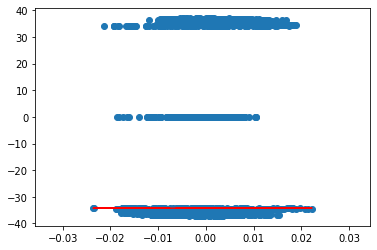

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [33]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -3.0785993964955427 + 844.8212812947367 x


In [34]:
-3.0785993964955427 + 844.8212812947367* -0.006187

-8.305508663866078

Bu bize lineer regresyonun verdiği tahmin değeri.Üstte SVR modeliyle tahmin ettiğimizde değer 34 çıktı burada 8 çıktı.Buradaki fark önem taşır.

Bu fark için iki denklemi üst üste koyarak aralarındaki ilişkiye bakabiliriz.

Text(0, 0.5, '50_target')

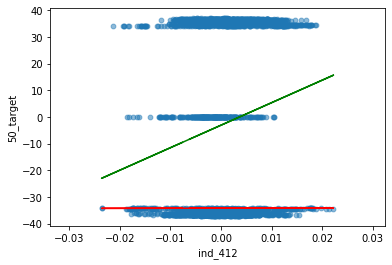

In [35]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("ind_412")
plt.ylabel("50_target")

***Kırmızı ve yeşil çizgileri yorumlarsak,doğrusal model yani lineer olan yeşil, SVR modeli kırmızıdır.Regresyon modeli daha yukarıdadır.Sebebi:SVR da aykırı gözlemler eğriyi yukarı doğru çeker.(En küçük kareler yönteminden dolayı.)

# TAHMİN

In [36]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -34.225854851292276 + 2.3921461080000004 x


In [37]:
svr_model.predict([[-0.006187]])

#Üstteki SVR modeli tahmin edildi.

array([-34.24065506])

In [38]:
y_pred = svr_model.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

46.62429069622837

*Tuned edilmemiş bir modelde test hatası 46 bulundu.KNN yönteminde bu değer 20 idi.

In [40]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# MODEL TUNING

In [41]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [44]:
pd.Series(svr_cv_model.best_params_)[0]

1.9000000000000001

In [45]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)


In [46]:
y_pred = svr_tuned.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

46.63301075415382

#Burada tek bir değişken ile bağımlı değişkeni yanı burada 50_target değişkenini tahmin ediyoruz.Aşağıda ise daha fazla değişken ile bu tahmini yapıyoruz.Çok değişken ile açıklarsak hataların karesi düşer.

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

23.82506517370464

# Doğrusal Olmayan SVR

In [5]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [6]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

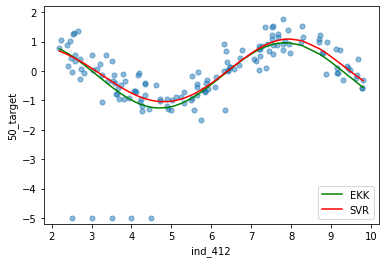

In [20]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("ind_412")
plt.ylabel("50_target")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

***Doğrusal olmayan SVR ve lineer regresyonu karşılaştırmak için bu grafik çizildi.Suni bir veriseti oluşturduk aykırı gözlemleri ekledik.EKK ve SVR eğrisel bir formdadır.Aşağıdaki aykırı gözlemler EKK eğrisini aşağıya doğru çekmiştir.

In [21]:
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [23]:
svr_rbf = SVR("rbf").fit(X_train, y_train)
#SVR 'ı doğrusal olmayan bir formda kurduk.

# Tahmin

In [24]:
y_pred = svr_rbf.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(y_test, y_pred))   
#Tüm değişkenleri kullanarak doğrusal olmayan formda model kurduk ve test hatası hesapladık.

23.82506517370464

# Model Tuning

In [26]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)  
#svr_rbf modelini kullanarak optimum parametre değerlerini 10 katlı cross validation ile bulmasını söyledik.
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
svr_cv_model.best_params_
#C değerinin 50 olduğu durumda optimum değere ulaşılır.Final modelini bunun üzerinden oluşturacağız.

{'C': 50}

In [28]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [31]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)
#Train üzerinden tuned edilmiş modeli kurduk.

In [32]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))


12.283123854447737

*En son aldığımız test hatası 23 idi. Şimdi hata 12'ye düştü.Tüm cross vaidation değerleri içinde en küçük hata terimine ulaşıldı.

*Bu şu anlama gelir:Eğer bu büyük gelseydi parametre setini değiştirip düzeltebilirdik.KNN değerinden iyi çıkmalıdır.Burada da daha düşük çıktı.

# Çok Katmanlı Algılayıcı

Yapay Sinir Ağları(YSA):
    İnsan beyninin bilgi işleme sistemini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen yöntemlerdir.

In [3]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

#Burada dönüştürme işlemine başladık.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train_scaled = scaler.transform(X_train)

In [10]:
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.neural_network import MLPRegressor

In [12]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [13]:
mlp_model
#Multi-linear perceptual

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Modele bakarsak daha fazla parametreye sahibiz.Gizli katman sayısı=100, Bu model içerisinden bazı değerlere ulaşmak istediğimizde aşağıdaki kodları kullanırız.

In [14]:
mlp_model.n_layers_  #Genel framework

4

In [15]:
mlp_model.hidden_layer_sizes #Genel framework'ün gizli katmanlarının içindeki nöron sayıları(elemanları) gösterir.

(100, 20)

# Tahmin

In [16]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 33.48467213,  36.79088152,  34.59975427,  34.17382388,
       -39.14508872])

In [17]:
y_pred = mlp_model.predict(X_test_scaled)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.153306261515374

Burada doğrusal olmayan SVR modelindeki hata terimlerine bakarsak 12 çıkmıştı.Şimdi 11 'e düştü.


# Model Tuning

In [19]:
mlp_model

#Gizli katman sayısına bakarsak mesela 1.katman 100,2.katman 20 nörondan oluşuyor.Bunlar arttırılabilir.

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [20]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(10,20,50)],  #Burada başka değerler de denenebilir.
             'activation': ['relu','logistic']}

In [21]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [ ]:
mlp_cv_model.fit(X_train_scaled, y_train)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [ ]:
mlp_tuned.fit(X_train_scaled, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CART(KARAR AĞACI MODELİ)

** Amacı karmaşık modelleri basit yapılara dönüştürmektir.Heterojen veri setleri de homojen bir şekilde gruplara ayrılır.

In [119]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [121]:
X_train = pd.DataFrame(X_train["ind_412"])
X_test = pd.DataFrame(X_test["ind_412"])

#ind_412 değişkeninin 50_target değişkeniyle ilişkisine bakacağız.

In [124]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [28]:
?cart_model

In [125]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

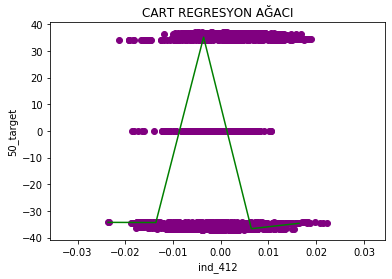

In [126]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'purple') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'green')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('ind_412') 
plt.ylabel('50_target') ;

**Burada bir regresyon problemini değişkenler bazında inceleyeceğiz.Burada bir parametre değişirse ağacın yapısının nasıl değiştiğini ele alacağız.

In [127]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 100)

In [128]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

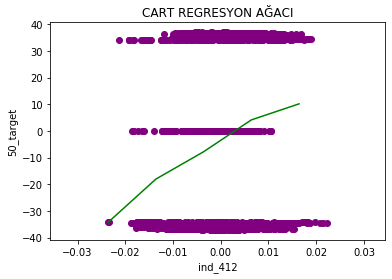

In [129]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'purple') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'green')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('ind_412') 
plt.ylabel('50_target') ;

Algoritmanın parametrelerini değiştirerek,optimum parametreleri bulmaya çalışıyoruz.

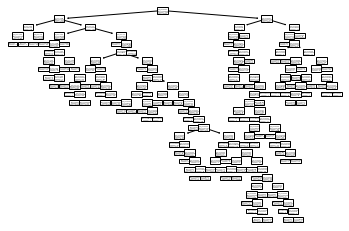

In [130]:
# plt.figure(figsize=(5,10))
tree.plot_tree(cart_model);

In [ ]:
#!pip install skompiler

In [ ]:
from skompiler import skompile

In [ ]:
print(skompile(cart_model.predict).to('python/code'))

# Tahmin 

In [29]:
x = [-0.006187]

In [30]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [31]:
cart_model.predict(X_test)[0:5]

array([  4.16796538, -35.09739446,  -2.55824725,   0.16162196,
        -3.23470869])

In [32]:
cart_model.predict([[-0.006187]])

array([-4.69261782])

In [33]:
y_pred =cart_model.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

35.44668949689822

# Model Tuning

Üstte kurduğumuz CART modelinde bazı parametreleri değiştireceğiz.

In [107]:
cart_model = DecisionTreeRegressor(max_leaf_nodes= 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [108]:
np.sqrt(mean_squared_error(y_test, y_pred))

34.12377351270486

In [113]:
cart_params = {"min_samples_split": range(3,50),
               "max_leaf_nodes": range(2,10)}

In [114]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [115]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=2,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(3, 50)},
             pre_dispatch='2*n_jobs', r

In [116]:
cart_cv_model.best_params_

{'max_leaf_nodes': 2, 'min_samples_split': 3}

In [121]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 2, min_samples_split = 3)

In [122]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=2,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [123]:
y_pred = cart_tuned.predict(X_test)

In [124]:
np.sqrt(mean_squared_error(y_test, y_pred))

34.12377351270486

**Burada tüm değişkenler ile model tahmini yaptık ve test hatasını 34 bulduk.Önceki değeri 46 idi. 

**Veri setine birden fazla değişken eklendiğinde bağımlı değişkendeki değişim açıklanabiliyorsa hata teriminin düştüğünü gözlemleriz.

In [ ]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

# Bagged Trees Regresyon

Temeli boostrap yöntemiyle oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesidir.

** Bagged modeliyle veri setinin içerisinde birden fazla ağacı aynı anda oluşturarak tahmin sergiler.

In [2]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [4]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

#bag_model adında yeni bir model kurduk.
#n_estimators= 10 tane ağaç oluşturulacak demektir.

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [5]:
bag_model.n_estimators

10

In [6]:
bag_model.estimators_

#Burada bulduklarımızın her birisi birbirinden farklı ağaçlardır.

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=492213219, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1640772457, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_dec

In [7]:
bag_model.estimators_samples_

#Her bir ağaçta kaç tane örnek vardır bunu gösteriyor.

[array([4115,  617,  161, ..., 2878,  603, 4267]),
 array([ 387, 4403, 2675, ..., 4390, 2039, 3844]),
 array([1428, 4425,  325, ..., 2995, 1732,  613]),
 array([4469, 3054,  244, ..., 2559, 2948, 4586]),
 array([1476,  960, 2082, ..., 4103, 1250, 3726]),
 array([3056, 2824, 2837, ...,  892,  969, 2533]),
 array([2733, 4053, 1116, ..., 4051, 4103, 2948]),
 array([2177,  629,  276, ..., 1447,  888,   55]),
 array([2845, 3674, 2312, ..., 2889, 1706, 3190]),
 array([4251, 3939,  169, ...,  339, 1476,  120])]

In [8]:
bag_model.estimators_features_

#Her bir ağacın bağımsız değişkenlerine ulaşmak istersek.Tüm ağaçlarda kullanılan değişken ve indexleeri belirledik.

[array([ 47,  90,  64,  74,  72, 116,  19,  63,  49,  20,  42, 126,  91,
         67, 130,  70,  68,  39,  71,  83, 109, 123,  40,  36,  82,  44,
         54,  41,  98,  50,  47,  12, 105,  73, 110,  85, 129,  91,  55,
         80,  49,  53, 109,  81, 116, 127, 119, 109,   4,  65,  84, 101,
         71,  81, 110,  53, 129,  41,  69,  50,  69, 125, 112, 119, 124,
          4, 115,  68,  70,  77,  53,  46,  13, 119, 131,  26,  82,  87,
        106,  70,  83,  30,  76, 119,  74, 111,  25,  15,  21,  88,   2,
          1,  81,  11,  75,  63,  26,  78,  40, 119,  97,  88, 114,  24,
        101,  99,  32,  33, 123,  58,  36,  15,  86,   3,  57,  37,  37,
         64,  34, 131,  37, 120,  90, 111,  32,  47,  45,  62,  19,  41,
         70, 130]),
 array([  0, 100,  61,  34,   7,  17,  43,   5,   6,  93, 116, 119, 120,
         61, 114, 104, 117, 122,  31,   3, 111,  75,  15, 130,  45, 111,
         94,  12,  61,   6,  46, 111,  13,  31,  98,  90,   7,  87,  21,
         25,  67,  83,  14,  22

In [9]:
bag_model.estimators_[0]

#1.modelin parametrelerine erişmiş olduk.

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=492213219, splitter='best')

# Tahmin-Bagging

In [10]:
y_pred = bag_model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test, y_pred))

#Topluluğun her birisinin verdiği tahminleri bir araya getirerek oluşturulan tahmin.

10.35245451160923

In [12]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

#İkinci ağaca gidilerek yapılan tahmin. Bu ağacın bize kurduğu modeldeki test hatasını göreceğiz.Bu ağaç bize kötü bir test hatası verdi.

In [13]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

12.304953208062015

In [14]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

#Yedinci ağaç ise ikiye göre daha iyi ama tüm tahminler arasında daha fazla hataya sahiptir.

In [15]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

12.529528599634052

# Model Tuning-Bagging

In [16]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [20]:
bag_params = {"n_estimators": range(50,200,500)}

In [21]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [22]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': range(50, 200, 500)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
bag_cv_model.best_params_

In [ ]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [ ]:
bag_tuned.fit(X_train, y_train)

In [ ]:
y_pred = bag_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# Random Forests

^^ Birden çok karar ağacının tahminlerinin bir araya getirilerek yeni bir ağaç topluluğu oluşması.

^^Kullanımı ,uygulanması ve sistem entegrrasyonu kolaydır.Hem regresyon hem classification gerçekleştirebilir.

^^Veri setindeki sonuç değişkeni ile ilgili en iyi kararı verebilmek amacıyla diğer bağımsız değişkenler için en iyi kombinasyonları oluşturmaya çalışır.

^^Gözlem seçiminde rassallığı sağlar,değişkenler random subspace yöntemi ile seçilir.

^^Ağaçlar düğüme ayrılır burada en üstteki değişken en önemli değişkendir.Hangi değişkenlere uygulanacağı bu değişkenlerden rastgele seçilir.(Daha küçük)

^^Ağaç oluşturmada veri setinin 2/3'ü kullanılır.Kalanı test için.

In [2]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
rf_model = RandomForestRegressor(random_state = 42)

#Modeli kurduk.

In [6]:
rf_model.fit(X_train, y_train)

#Burada n_estimators: 100, fit edilecek ağaç sayısı
#max_features:Bölünme işlemlerinde göz önünde bulunduralabilecek max değişken sayısını ifade eder.

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

# Tahmin-RF

In [7]:
rf_model.predict(X_test)[0:5]

array([ -8.32380125,  36.0607424 , -35.88967859, -33.17631752,
        36.66883464])

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.300497912528172

Burada test hatası 9.30 çıktı.Şuana kadarki bulunan en az test hatasıdır.

# Model Tuning-RF

In [10]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [10, 100, 200, 500]}

In [11]:
rf_model = RandomForestRegressor(random_state = 42)

In [12]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [ ]:
rf_cv_model.fit(X_train, y_train)

In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [ ]:
rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

Burada artıklar üzerine tek bir tahminsel model formunda olan model serileri kurulur.

Adaboost: Adaptive Boosting = Zayıf öğrenicileri bir araya getirip güçlü bir sınıflandırıcı çıkabilir mi diye uğraşılır.

^^Seri içerisindeki bir model , bir önceki modelin tahmin artıklarının residualların üzerine fit edilerek model oluşturulur.

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

learning rate, n estimator ve diğer parametreler önemlidir.

# Tahmin- GBM

In [8]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

10.285118704204042

***Test hatası 10.28, Random forest modelinin ilkel hatasına göre daha yüksek bir oran çıktı.

# Model Tuning-GBM

In [9]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [ ]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.8min


In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

#Değişken önem düzeyi

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XG Boost (Extreme Gradient Boosting) 

Bu model GBM modelinin hız ve tahmin performansını arttırmak üzere optimize edilmiş,ölçeklenebilir,farklı platformlara entegre edilebilir halidir.

In [6]:
!pip install xgboost

In [7]:
import xgboost as xgb

In [8]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [9]:
from xgboost import XGBRegressor

In [10]:
xgb_model = XGBRegressor().fit(X_train, y_train)

# Tahmin-XG Boost

In [11]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

9.014328929728414

***Şimdiye kadar hesaplanan en düşük test hatası !!

# Model Tuning-XG Boost

In [12]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [13]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Light GBM

XG Boostun eğitim süresi performansını arttırmaya yönelik geliştirilen bir modeldir.
^^Daha performanslıdır.
^^Level-wise büyüme stratejisi yerine leaf-wise stratejisini izler.

In [14]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [16]:
!pip install lightgbm

In [17]:
from lightgbm import LGBMRegressor

In [18]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

# Tahmin- Light GBM

In [19]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.285740798323621

# Model Tuning-Light GBM

In [21]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost- Category Boosting

*CatBoost: Kategorik değişkenler ile otomatik olarak mücadele eden,hızlı ve başarılı bir GBM türüdür.
    
    -Daha başarılı tahminler üretir.
    -Hızlı train ve hızlı tahmin üretir.
    -Hızlı ve ölçeklenebilir GPU desteği vardır.

In [2]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
!pip install catboost

  Using cached catboost-0.24-cp37-none-win_amd64.whl (65.1 MB)
  Using cached plotly-4.9.0-py2.py3-none-any.whl (12.9 MB)


In [14]:
from catboost import CatBoostRegressor

In [7]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.051261
0:	learn: 33.0511878	total: 71.1ms	remaining: 1m 11s
1:	learn: 31.6325735	total: 90.2ms	remaining: 45s
2:	learn: 30.2735035	total: 109ms	remaining: 36.1s
3:	learn: 28.9796069	total: 127ms	remaining: 31.6s
4:	learn: 27.7613871	total: 144ms	remaining: 28.7s
5:	learn: 26.6233841	total: 162ms	remaining: 26.9s
6:	learn: 25.5381946	total: 182ms	remaining: 25.8s
7:	learn: 24.5264285	total: 207ms	remaining: 25.7s
8:	learn: 23.6041811	total: 229ms	remaining: 25.2s
9:	learn: 22.7178053	total: 249ms	remaining: 24.7s
10:	learn: 21.8758018	total: 274ms	remaining: 24.7s
11:	learn: 21.0999886	total: 295ms	remaining: 24.3s
12:	learn: 20.3714217	total: 316ms	remaining: 24s
13:	learn: 19.6755631	total: 335ms	remaining: 23.6s
14:	learn: 19.0392335	total: 360ms	remaining: 23.6s
15:	learn: 18.4323515	total: 381ms	remaining: 23.4s
16:	learn: 17.8821577	total: 400ms	remaining: 23.1s
17:	learn: 17.3373485	total: 420ms	remaining: 22.9s
18:	learn: 16.8615031	total: 439ms	remaining:

160:	learn: 9.0068662	total: 3.37s	remaining: 17.6s
161:	learn: 8.9951656	total: 3.4s	remaining: 17.6s
162:	learn: 8.9757389	total: 3.42s	remaining: 17.6s
163:	learn: 8.9733034	total: 3.44s	remaining: 17.5s
164:	learn: 8.9703442	total: 3.46s	remaining: 17.5s
165:	learn: 8.9628402	total: 3.48s	remaining: 17.5s
166:	learn: 8.9517957	total: 3.5s	remaining: 17.5s
167:	learn: 8.9248032	total: 3.52s	remaining: 17.4s
168:	learn: 8.9180184	total: 3.54s	remaining: 17.4s
169:	learn: 8.9156891	total: 3.56s	remaining: 17.4s
170:	learn: 8.9097841	total: 3.59s	remaining: 17.4s
171:	learn: 8.9067724	total: 3.61s	remaining: 17.4s
172:	learn: 8.9042597	total: 3.62s	remaining: 17.3s
173:	learn: 8.8913920	total: 3.64s	remaining: 17.3s
174:	learn: 8.8771940	total: 3.66s	remaining: 17.3s
175:	learn: 8.8740529	total: 3.68s	remaining: 17.2s
176:	learn: 8.8667791	total: 3.69s	remaining: 17.2s
177:	learn: 8.8605819	total: 3.71s	remaining: 17.2s
178:	learn: 8.8514877	total: 3.74s	remaining: 17.1s
179:	learn: 8.

322:	learn: 7.5390505	total: 6.76s	remaining: 14.2s
323:	learn: 7.5341366	total: 6.79s	remaining: 14.2s
324:	learn: 7.5303094	total: 6.81s	remaining: 14.1s
325:	learn: 7.5288908	total: 6.83s	remaining: 14.1s
326:	learn: 7.5223894	total: 6.85s	remaining: 14.1s
327:	learn: 7.5148947	total: 6.87s	remaining: 14.1s
328:	learn: 7.5065295	total: 6.9s	remaining: 14.1s
329:	learn: 7.5040671	total: 6.92s	remaining: 14s
330:	learn: 7.4936627	total: 6.94s	remaining: 14s
331:	learn: 7.4860489	total: 6.96s	remaining: 14s
332:	learn: 7.4765272	total: 6.98s	remaining: 14s
333:	learn: 7.4702129	total: 7s	remaining: 14s
334:	learn: 7.4648352	total: 7.02s	remaining: 13.9s
335:	learn: 7.4568828	total: 7.04s	remaining: 13.9s
336:	learn: 7.4536048	total: 7.06s	remaining: 13.9s
337:	learn: 7.4504187	total: 7.08s	remaining: 13.9s
338:	learn: 7.4476745	total: 7.1s	remaining: 13.8s
339:	learn: 7.4419858	total: 7.12s	remaining: 13.8s
340:	learn: 7.4334063	total: 7.14s	remaining: 13.8s
341:	learn: 7.4224434	total

482:	learn: 6.4890078	total: 10.1s	remaining: 10.9s
483:	learn: 6.4846030	total: 10.2s	remaining: 10.8s
484:	learn: 6.4760193	total: 10.2s	remaining: 10.8s
485:	learn: 6.4642838	total: 10.2s	remaining: 10.8s
486:	learn: 6.4582971	total: 10.2s	remaining: 10.8s
487:	learn: 6.4557603	total: 10.3s	remaining: 10.8s
488:	learn: 6.4533372	total: 10.3s	remaining: 10.7s
489:	learn: 6.4450761	total: 10.3s	remaining: 10.7s
490:	learn: 6.4416070	total: 10.3s	remaining: 10.7s
491:	learn: 6.4401045	total: 10.4s	remaining: 10.7s
492:	learn: 6.4354117	total: 10.4s	remaining: 10.7s
493:	learn: 6.4267043	total: 10.4s	remaining: 10.7s
494:	learn: 6.4204997	total: 10.4s	remaining: 10.6s
495:	learn: 6.4187026	total: 10.4s	remaining: 10.6s
496:	learn: 6.4104582	total: 10.5s	remaining: 10.6s
497:	learn: 6.3975420	total: 10.5s	remaining: 10.6s
498:	learn: 6.3944560	total: 10.5s	remaining: 10.6s
499:	learn: 6.3850532	total: 10.6s	remaining: 10.6s
500:	learn: 6.3834068	total: 10.6s	remaining: 10.5s
501:	learn: 

644:	learn: 5.6431999	total: 13.7s	remaining: 7.54s
645:	learn: 5.6371254	total: 13.7s	remaining: 7.52s
646:	learn: 5.6352083	total: 13.7s	remaining: 7.5s
647:	learn: 5.6265906	total: 13.8s	remaining: 7.48s
648:	learn: 5.6207113	total: 13.8s	remaining: 7.45s
649:	learn: 5.6132025	total: 13.8s	remaining: 7.43s
650:	learn: 5.6094808	total: 13.8s	remaining: 7.41s
651:	learn: 5.6057797	total: 13.9s	remaining: 7.39s
652:	learn: 5.6018160	total: 13.9s	remaining: 7.38s
653:	learn: 5.5959602	total: 13.9s	remaining: 7.36s
654:	learn: 5.5911185	total: 13.9s	remaining: 7.34s
655:	learn: 5.5848683	total: 14s	remaining: 7.32s
656:	learn: 5.5748632	total: 14s	remaining: 7.3s
657:	learn: 5.5692072	total: 14s	remaining: 7.28s
658:	learn: 5.5648796	total: 14s	remaining: 7.26s
659:	learn: 5.5608179	total: 14.1s	remaining: 7.24s
660:	learn: 5.5567244	total: 14.1s	remaining: 7.22s
661:	learn: 5.5527396	total: 14.1s	remaining: 7.21s
662:	learn: 5.5503884	total: 14.1s	remaining: 7.19s
663:	learn: 5.5434427	

804:	learn: 4.9376941	total: 17.2s	remaining: 4.18s
805:	learn: 4.9344691	total: 17.3s	remaining: 4.16s
806:	learn: 4.9306292	total: 17.3s	remaining: 4.14s
807:	learn: 4.9268382	total: 17.3s	remaining: 4.11s
808:	learn: 4.9245256	total: 17.3s	remaining: 4.09s
809:	learn: 4.9215074	total: 17.4s	remaining: 4.07s
810:	learn: 4.9152313	total: 17.4s	remaining: 4.05s
811:	learn: 4.9146561	total: 17.4s	remaining: 4.03s
812:	learn: 4.9116515	total: 17.4s	remaining: 4s
813:	learn: 4.9052686	total: 17.4s	remaining: 3.98s
814:	learn: 4.9014525	total: 17.5s	remaining: 3.96s
815:	learn: 4.8975092	total: 17.5s	remaining: 3.94s
816:	learn: 4.8939886	total: 17.5s	remaining: 3.92s
817:	learn: 4.8904782	total: 17.5s	remaining: 3.9s
818:	learn: 4.8871701	total: 17.5s	remaining: 3.88s
819:	learn: 4.8834387	total: 17.6s	remaining: 3.85s
820:	learn: 4.8817367	total: 17.6s	remaining: 3.83s
821:	learn: 4.8803539	total: 17.6s	remaining: 3.81s
822:	learn: 4.8752116	total: 17.6s	remaining: 3.79s
823:	learn: 4.87

964:	learn: 4.3898171	total: 20.6s	remaining: 747ms
965:	learn: 4.3872632	total: 20.6s	remaining: 726ms
966:	learn: 4.3847216	total: 20.7s	remaining: 705ms
967:	learn: 4.3833095	total: 20.7s	remaining: 683ms
968:	learn: 4.3823821	total: 20.7s	remaining: 662ms
969:	learn: 4.3808194	total: 20.7s	remaining: 640ms
970:	learn: 4.3754572	total: 20.7s	remaining: 619ms
971:	learn: 4.3744408	total: 20.7s	remaining: 598ms
972:	learn: 4.3683580	total: 20.8s	remaining: 576ms
973:	learn: 4.3660022	total: 20.8s	remaining: 555ms
974:	learn: 4.3605831	total: 20.8s	remaining: 534ms
975:	learn: 4.3581161	total: 20.8s	remaining: 513ms
976:	learn: 4.3560846	total: 20.9s	remaining: 491ms
977:	learn: 4.3517447	total: 20.9s	remaining: 470ms
978:	learn: 4.3485196	total: 20.9s	remaining: 448ms
979:	learn: 4.3459797	total: 20.9s	remaining: 427ms
980:	learn: 4.3437288	total: 20.9s	remaining: 406ms
981:	learn: 4.3371805	total: 21s	remaining: 384ms
982:	learn: 4.3324236	total: 21s	remaining: 363ms
983:	learn: 4.33

# Tahmin-CatBoost

In [8]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

9.485395781479296

# Model Tuning-CatBoost

In [12]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [15]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [16]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 19.6min finished


0:	learn: 34.5608883	total: 75ms	remaining: 37.4s
1:	learn: 34.5531660	total: 76.1ms	remaining: 19s
2:	learn: 34.5462733	total: 77.5ms	remaining: 12.8s
3:	learn: 34.5392283	total: 78.9ms	remaining: 9.78s
4:	learn: 34.5316615	total: 80.1ms	remaining: 7.92s
5:	learn: 34.5249812	total: 82ms	remaining: 6.75s
6:	learn: 34.5181178	total: 83.6ms	remaining: 5.89s
7:	learn: 34.5111092	total: 84.9ms	remaining: 5.22s
8:	learn: 34.5039756	total: 86.9ms	remaining: 4.74s
9:	learn: 34.4974314	total: 89ms	remaining: 4.36s
10:	learn: 34.4912190	total: 90.5ms	remaining: 4.02s
11:	learn: 34.4848011	total: 92.2ms	remaining: 3.75s
12:	learn: 34.4787410	total: 93.3ms	remaining: 3.49s
13:	learn: 34.4735419	total: 94.4ms	remaining: 3.28s
14:	learn: 34.4676827	total: 100ms	remaining: 3.25s
15:	learn: 34.4620988	total: 102ms	remaining: 3.09s
16:	learn: 34.4571157	total: 104ms	remaining: 2.95s
17:	learn: 34.4522909	total: 106ms	remaining: 2.83s
18:	learn: 34.4469870	total: 107ms	remaining: 2.7s
19:	learn: 34.441

208:	learn: 34.1257919	total: 358ms	remaining: 498ms
209:	learn: 34.1255160	total: 359ms	remaining: 496ms
210:	learn: 34.1250416	total: 361ms	remaining: 495ms
211:	learn: 34.1243028	total: 364ms	remaining: 494ms
212:	learn: 34.1240523	total: 365ms	remaining: 492ms
213:	learn: 34.1236219	total: 366ms	remaining: 489ms
214:	learn: 34.1231111	total: 368ms	remaining: 488ms
215:	learn: 34.1227651	total: 370ms	remaining: 486ms
216:	learn: 34.1222081	total: 372ms	remaining: 485ms
217:	learn: 34.1215437	total: 373ms	remaining: 483ms
218:	learn: 34.1212382	total: 374ms	remaining: 480ms
219:	learn: 34.1206322	total: 376ms	remaining: 478ms
220:	learn: 34.1202534	total: 377ms	remaining: 476ms
221:	learn: 34.1200569	total: 378ms	remaining: 473ms
222:	learn: 34.1197856	total: 380ms	remaining: 472ms
223:	learn: 34.1194185	total: 381ms	remaining: 469ms
224:	learn: 34.1188508	total: 382ms	remaining: 467ms
225:	learn: 34.1180911	total: 383ms	remaining: 464ms
226:	learn: 34.1175258	total: 385ms	remaining:

429:	learn: 34.0620574	total: 649ms	remaining: 106ms
430:	learn: 34.0620232	total: 651ms	remaining: 104ms
431:	learn: 34.0617293	total: 652ms	remaining: 103ms
432:	learn: 34.0616817	total: 654ms	remaining: 101ms
433:	learn: 34.0615107	total: 655ms	remaining: 99.7ms
434:	learn: 34.0614210	total: 657ms	remaining: 98.2ms
435:	learn: 34.0611186	total: 658ms	remaining: 96.6ms
436:	learn: 34.0610311	total: 660ms	remaining: 95.1ms
437:	learn: 34.0609535	total: 661ms	remaining: 93.5ms
438:	learn: 34.0608125	total: 662ms	remaining: 92ms
439:	learn: 34.0607242	total: 663ms	remaining: 90.4ms
440:	learn: 34.0605816	total: 665ms	remaining: 88.9ms
441:	learn: 34.0601303	total: 666ms	remaining: 87.4ms
442:	learn: 34.0597328	total: 667ms	remaining: 85.8ms
443:	learn: 34.0596680	total: 668ms	remaining: 84.3ms
444:	learn: 34.0594899	total: 670ms	remaining: 82.8ms
445:	learn: 34.0592198	total: 671ms	remaining: 81.3ms
446:	learn: 34.0591005	total: 673ms	remaining: 79.8ms
447:	learn: 34.0589776	total: 674m

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020F48B8D908>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [17]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [18]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 34.5597710	total: 4.66ms	remaining: 927ms
1:	learn: 34.5509758	total: 8.97ms	remaining: 888ms
2:	learn: 34.5423020	total: 13.1ms	remaining: 858ms
3:	learn: 34.5339280	total: 17.8ms	remaining: 870ms
4:	learn: 34.5257233	total: 21.6ms	remaining: 843ms
5:	learn: 34.5173548	total: 26.7ms	remaining: 864ms
6:	learn: 34.5096761	total: 30.9ms	remaining: 853ms
7:	learn: 34.5019948	total: 35.8ms	remaining: 859ms
8:	learn: 34.4943126	total: 40.3ms	remaining: 854ms
9:	learn: 34.4866753	total: 45.8ms	remaining: 870ms
10:	learn: 34.4804921	total: 47.3ms	remaining: 812ms
11:	learn: 34.4733581	total: 51ms	remaining: 799ms
12:	learn: 34.4669727	total: 55.6ms	remaining: 800ms
13:	learn: 34.4601385	total: 60.1ms	remaining: 799ms
14:	learn: 34.4535154	total: 64.1ms	remaining: 790ms
15:	learn: 34.4465537	total: 67.9ms	remaining: 781ms
16:	learn: 34.4398589	total: 71.8ms	remaining: 773ms
17:	learn: 34.4346711	total: 73.2ms	remaining: 741ms
18:	learn: 34.4283881	total: 77.2ms	remaining: 736ms
19:	l

195:	learn: 34.0654945	total: 844ms	remaining: 17.2ms
196:	learn: 34.0650454	total: 848ms	remaining: 12.9ms
197:	learn: 34.0644315	total: 852ms	remaining: 8.61ms
198:	learn: 34.0638660	total: 857ms	remaining: 4.31ms
199:	learn: 34.0630598	total: 862ms	remaining: 0us


In [19]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

34.073456901169045